<a href="https://colab.research.google.com/github/nikhilgodalla/ObesityDataScience/blob/main/Combine_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Abstract**

The dataset comprises estimations of obesity levels among individuals in Mexico, Peru, and Colombia, spanning ages from 14 to 61 and encompassing various dietary habits and physical conditions. Data collection was facilitated through a web platform, where anonymous respondents completed a survey. Subsequently, the gathered information underwent processing, resulting in 17 attributes and 2111 records.

The attributes pertaining to dietary habits include the frequency of consuming high-calorie foods (FAVC), vegetable consumption frequency (FCVC), number of main meals (NCP), consumption of snacks between meals (CAEC), daily water intake (CH20), and alcohol consumption (CALC). Attributes concerning physical condition encompass the monitoring of calorie intake (SCC), frequency of physical activity (FAF), time spent using technological devices (TUE), and mode of transportation used (MTRANS).

The variables obtained include gender, age, height, and weight. Obesity levels are categorized as follows:

Underweight: 1
Normal: 2
Overweight: 3
Obesity I:4
Obesity II: 5
Obesity III: 6
The dataset encompasses both numerical and continuous data, making it suitable for analysis for performing predicitions.

Link - https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster

# **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from scipy.stats import norm
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

# **Loading and Reading Dataset**

In [ ]:

null_values = ['-',np.nan]
data= pd.read_csv("https://raw.githubusercontent.com/nikhilgodalla/ObesityDataScience/main/ObesityDataSet.csv",na_values=null_values)

df = data.copy()


In [ ]:
df.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

**1)What are the data types? (Only numeric and categorical)**

In [ ]:
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [ ]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

print("Numeric Columns:", numeric_columns)
print("Categorical Columns:", categorical_columns)


Numeric Columns: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
Categorical Columns: ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']


**2)Are there missing values?**

In [ ]:
df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

The dataset contains no null values, indicating that there are no missing data points across the variables.

**3)What are the likely distributions of the numeric variables?**

Histograms and Q-Q (Quantile-Quantile) plots is a powerful and insightful way to explore the likely distributions of numeric variables.

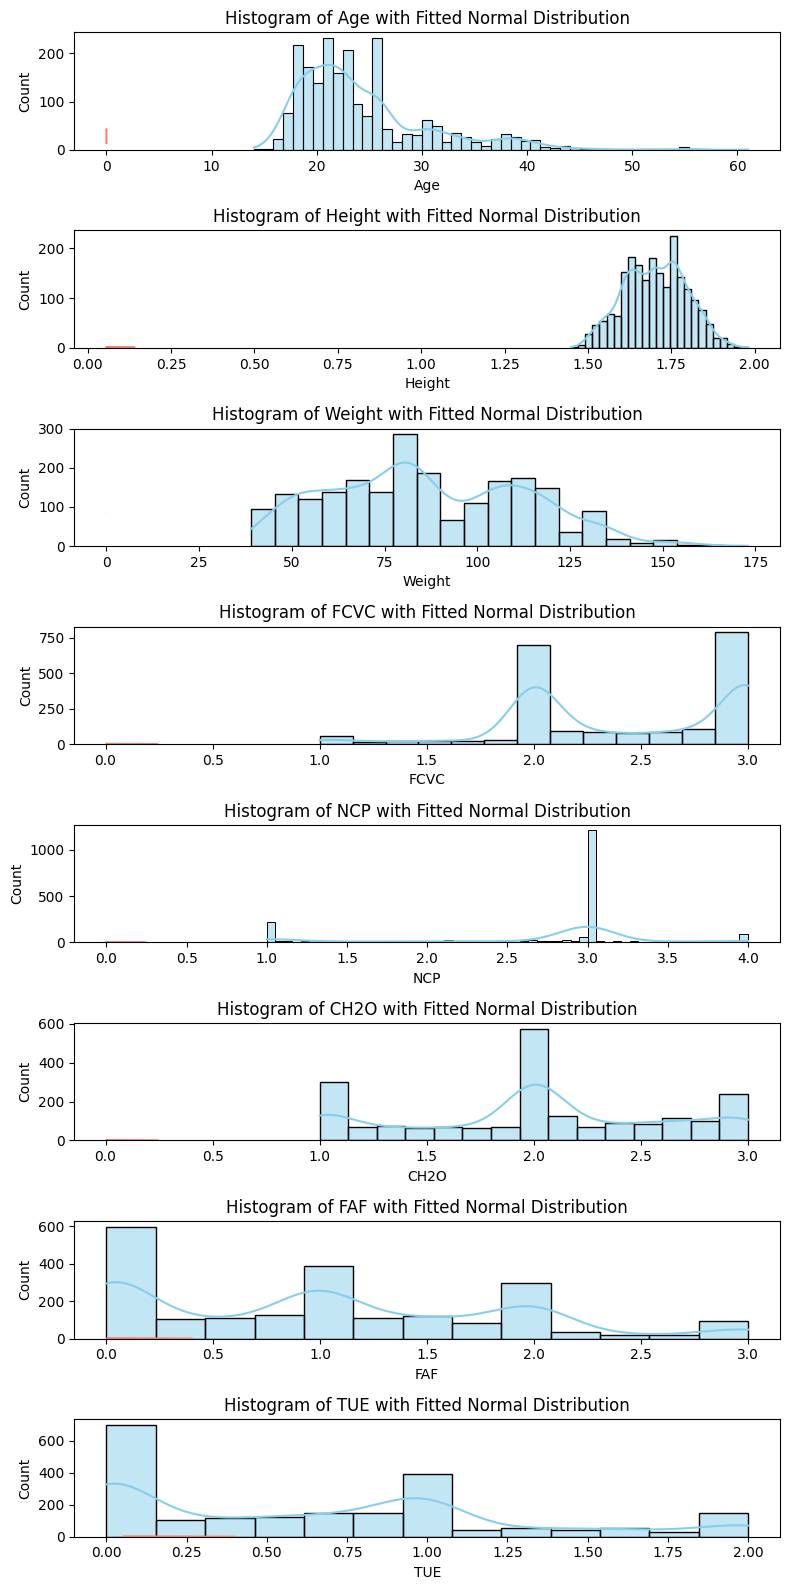

In [ ]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=1, figsize=(8, 2 * len(numeric_columns)))

for i, column in enumerate(numeric_columns):
    sns.histplot(df[column], kde=True, ax=axes[i], color='skyblue')
    sns.lineplot(x=norm.pdf(sorted(df[column])), y=sorted(df[column]), ax=axes[i], color='salmon')
    axes[i].set_title(f'Histogram of {column} with Fitted Normal Distribution')


plt.tight_layout()
plt.show()

Age: The histogram of age looks to have a bimodal distribution with two peaks, indicating that it does not closely resemble a normal distribution.

Height: This histogram is more bell-shaped, indicating that height is about normally distributed, however it seems to have a longer tail to the right (positively skewed).

Weight: The histogram appears to be right-skewed, indicating a tail on the right side. It is not an exact match for a normal distribution.

FCVC (Frequency of Vegetable Consumption): This histogram is not symmetrical, with peaks at certain intervals, indicating that it is not normally distributed.

NCP (Number of Main Meals): The distribution is heavily concentrated around a single number with limited variance, unlike a normal distribution.

CH2O (Water Consumption): The histogram indicates an abnormal distribution, with many peaks and a non-symmetrical shape.

The histogram for FAF (Physical Activity Frequency) reveals a non-normal distribution with many peaks, similar to those of FCVC and CH2O.

TUE (Time Using Technology Devices): The histogram shows an unusual distribution, with a peak on the lower end and a lengthy tail to the right.

Column Names in DataFrame: Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


<Figure size 800x500 with 0 Axes>

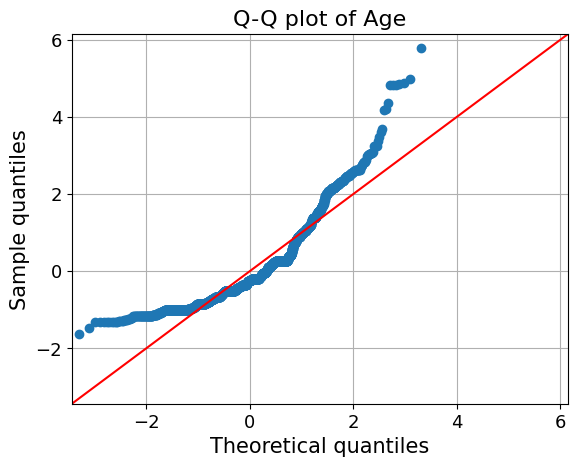

<Figure size 800x500 with 0 Axes>

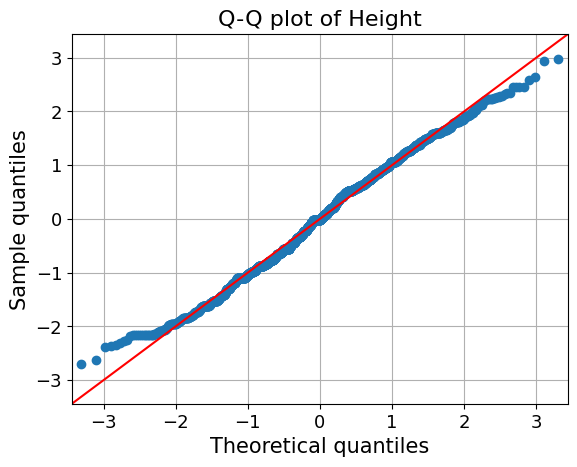

<Figure size 800x500 with 0 Axes>

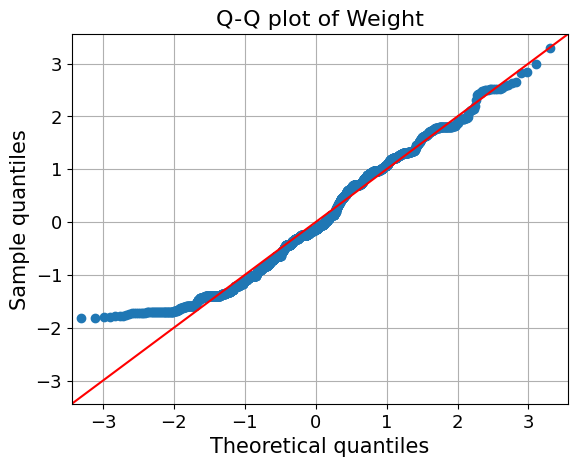

<Figure size 800x500 with 0 Axes>

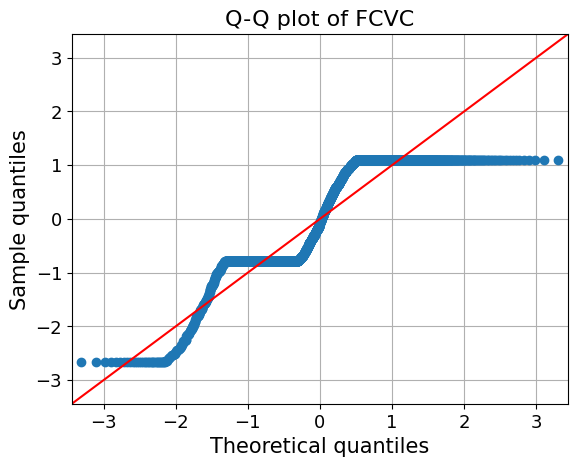

<Figure size 800x500 with 0 Axes>

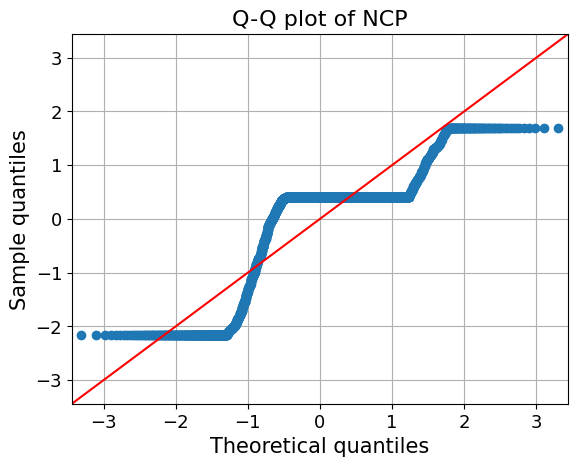

<Figure size 800x500 with 0 Axes>

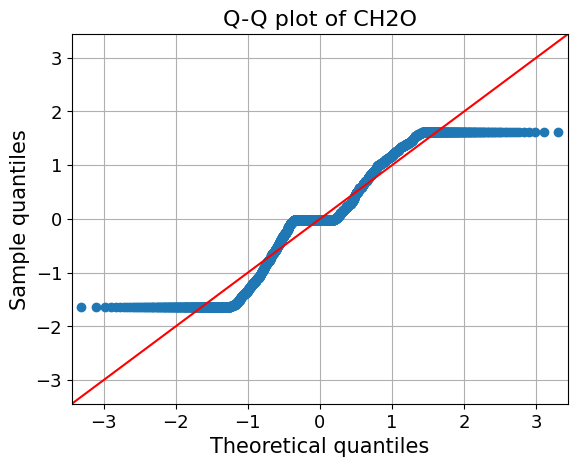

<Figure size 800x500 with 0 Axes>

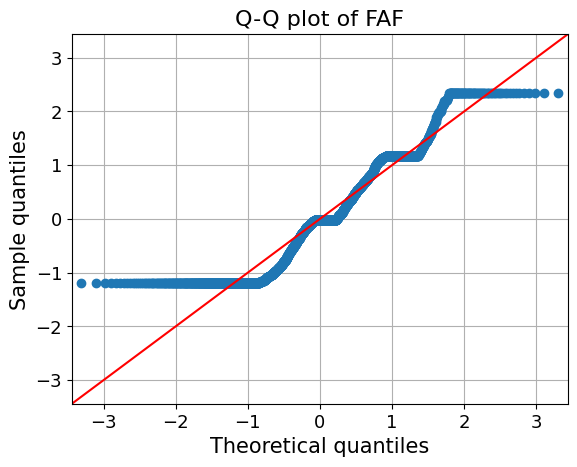

<Figure size 800x500 with 0 Axes>

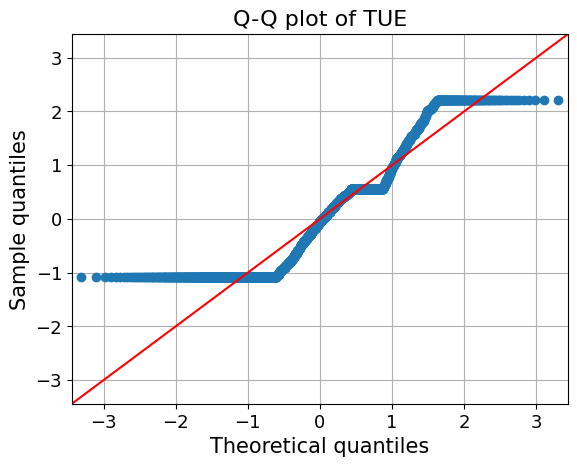

In [ ]:
from statsmodels.graphics.gofplots import qqplot

# Print the column names in the DataFrame
print("Column Names in DataFrame:", df.columns)


for c in df.columns:

    if df[c].dtype in ['float64', 'int64']:

        plt.figure(figsize=(8, 5))


        fig = qqplot(df[c], line="45", fit="True")

        plt.xticks(fontsize=13)
        plt.yticks(fontsize=13)
        plt.xlabel("Theoretical quantiles", fontsize=15)
        plt.ylabel("Sample quantiles", fontsize=15)
        plt.title("Q-Q plot of {}".format(c), fontsize=16)
        plt.grid(True)

        # Display the plot
        plt.show()



From the above q-q plot we can infer that the variables  are roughly following normal distribution.

**Label Encoding**

In [ ]:

# Define the ordinal mapping for 'NObeyesdad'
ordinal_mapping = {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Overweight_Level_I': 2, 'Overweight_Level_II': 3, 'Obesity_Type_I': 4, 'Obesity_Type_II': 5, 'Obesity_Type_III': 6}

# Apply label encoding with specified mapping
df['NObeyesdad'] = df['NObeyesdad'].map(ordinal_mapping)

# Perform label encoding for other categorical attributes using one-hot encoding
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
obesity_data = df.copy()

In [ ]:
df.head()


Age  Height  Weight  FCVC  NCP  CH2O  FAF  TUE  NObeyesdad  Gender_Male  \
0  21.0    1.62    64.0   2.0  3.0   2.0  0.0  1.0           1            0   
1  21.0    1.52    56.0   3.0  3.0   3.0  3.0  0.0           1            0   
2  23.0    1.80    77.0   2.0  3.0   2.0  2.0  1.0           1            1   
3  27.0    1.80    87.0   3.0  3.0   2.0  2.0  0.0           2            1   
4  22.0    1.78    89.8   2.0  1.0   2.0  0.0  0.0           3            1   

   ...  CAEC_no  SMOKE_yes  SCC_yes  CALC_Frequently  CALC_Sometimes  CALC_no  \
0  ...        0          0        0                0               0        1   
1  ...        0          1        1                0               1        0   
2  ...        0          0        0                1               0        0   
3  ...        0          0        0                1               0        0   
4  ...        0          0        0                0               1        0   

   MTRANS_Bike  MTRANS_Motorbike  MTRANS_Public_Transportation  MTRANS_Walking  
0            0                 0                             1               0  
1            0                 0                             1               0  
2            0                 0                             1               0  
3            0                 0                             0               1  
4            0                 0                             1               0  

[5 rows x 24 columns]

The code uses LabelEncoder and ordinal mapping to convert the DataFrame's category variables into numerical values. The encoded columns are: 'Gender,' 'family_history_with_overweight,' 'FAVC,' 'SMOKE,' 'SCC,' 'CALC,' and 'MTRANS'. The resulting DataFrame now has numerical values that correspond to the original category data, which is required for several machine learning approaches.

**4)Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)**

Univariate, Ols regression, correlation, and random forest classifier can all be used to predict a target variable.

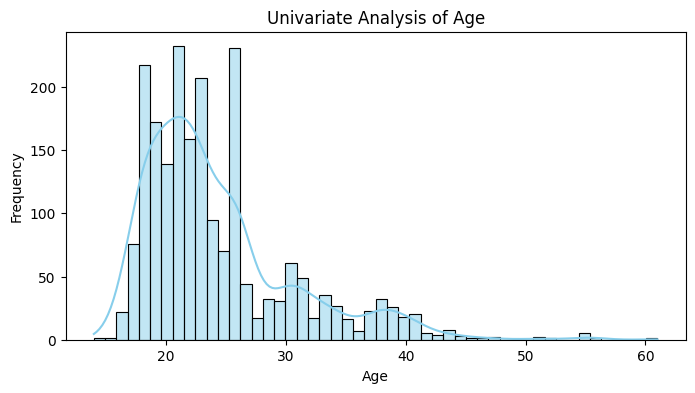

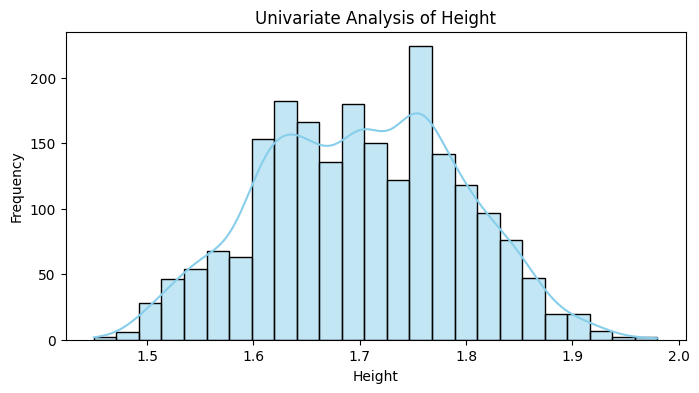

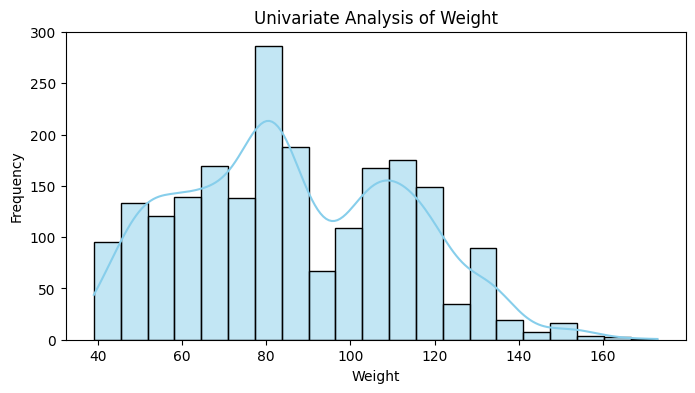

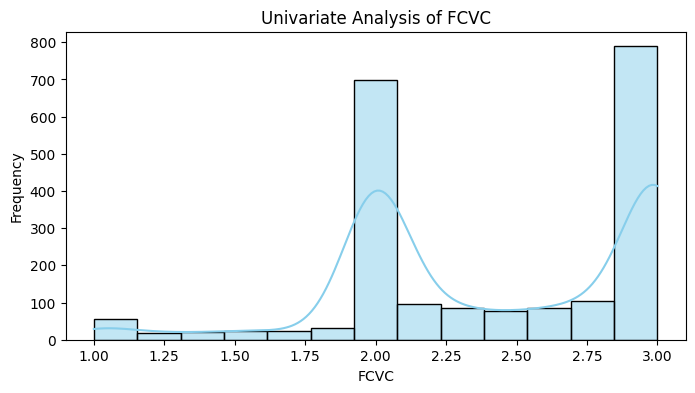

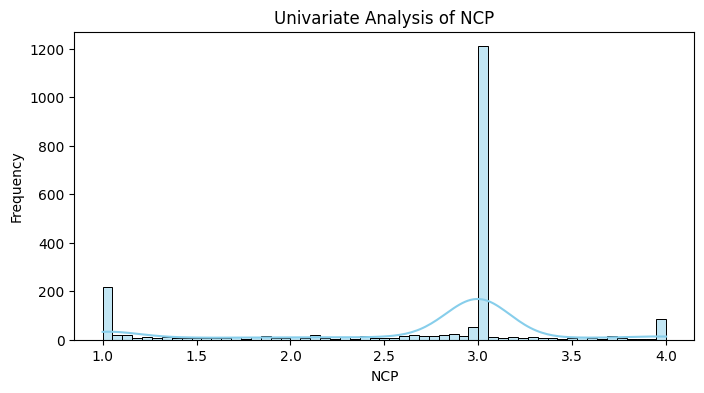

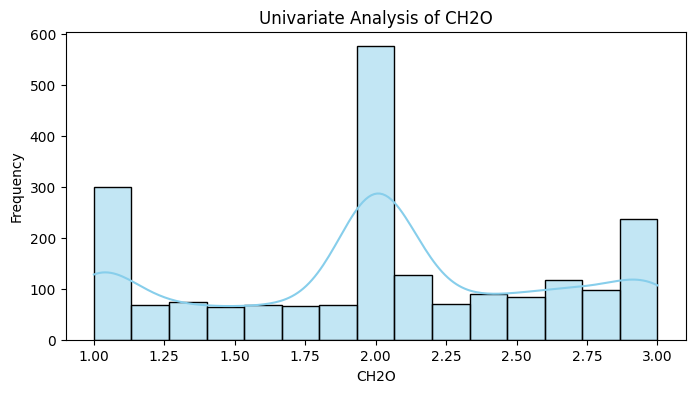

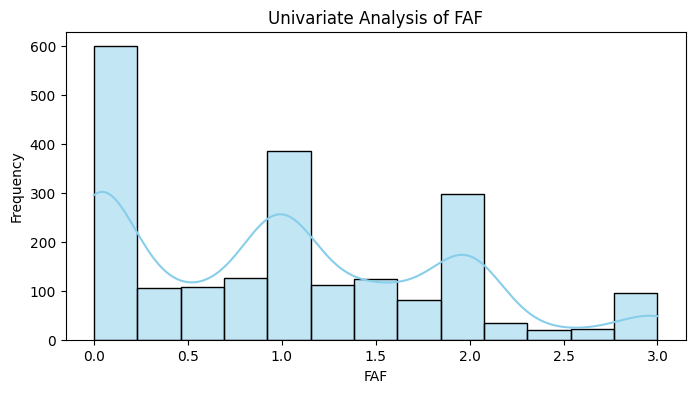

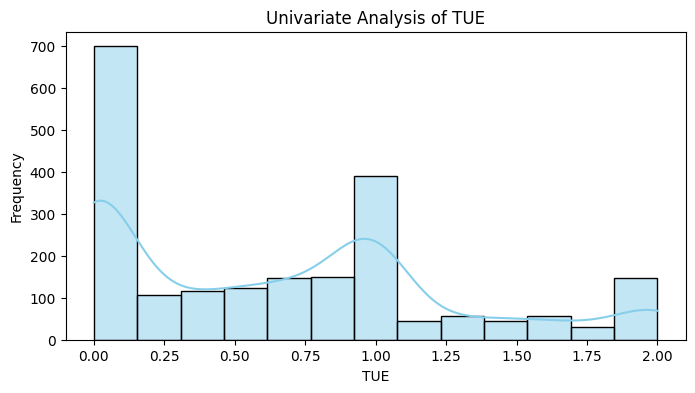

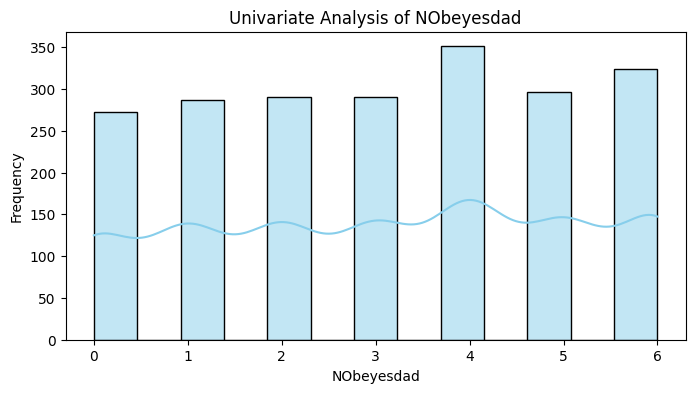

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Univariate analysis for numerical variables (histograms)
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True, color='skyblue')
    plt.title(f'Univariate Analysis of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Univariate analysis for categorical variables (bar plots)
for column in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=column, data=df, palette='viridis')
    plt.title(f'Univariate Analysis of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()


In [ ]:
import statsmodels.api as sm


X = sm.add_constant(df[['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']])
y = df['NObeyesdad']

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             NObeyesdad   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     4523.
Date:                Tue, 02 Apr 2024   Prob (F-statistic):               0.00
Time:                        22:32:27   Log-Likelihood:                -1379.1
No. Observations:                2111   AIC:                             2776.
Df Residuals:                    2102   BIC:                             2827.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.5766      0.226     37.929      0.0

Based on this data, you may conclude that the model is statistically significant, and that the significant factors (age, height, weight, FCVC, NCP, and CH2O) are related to the dependent variable (NObeyesdad).

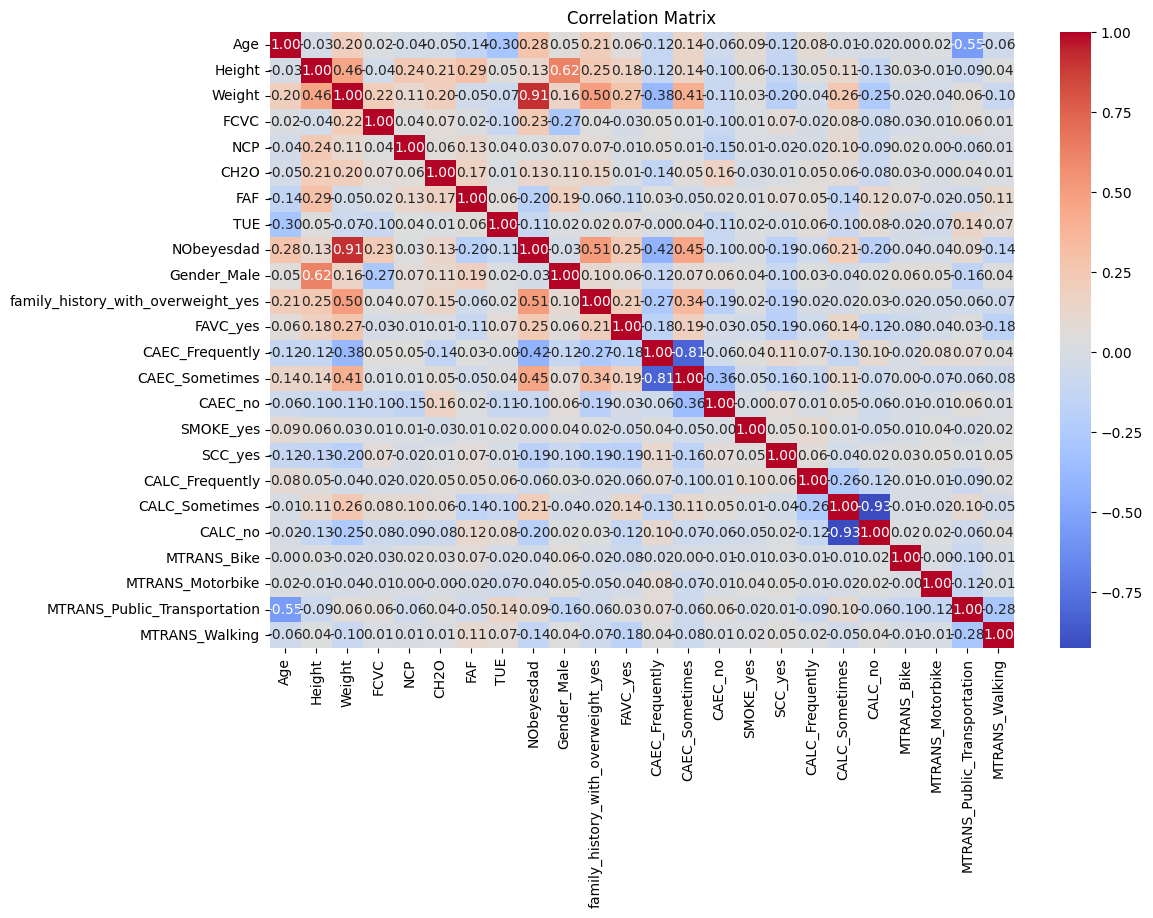

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


correlation_matrix = df.corr()

# Plot a heatmap to visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


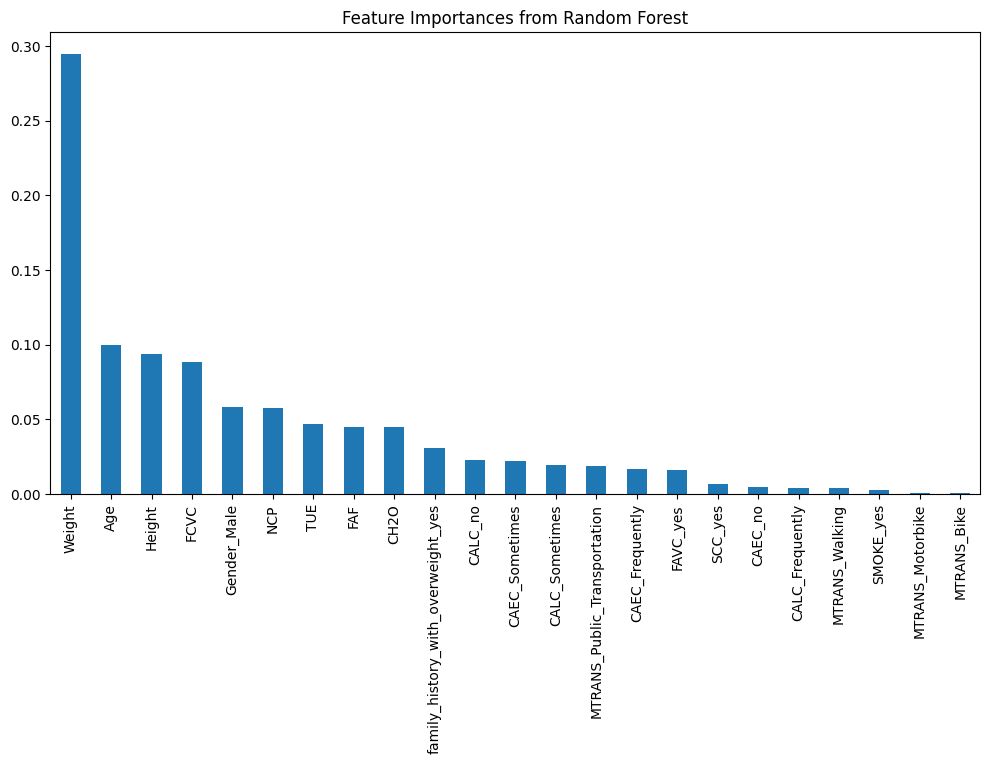

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']


model = RandomForestClassifier()
model.fit(X, y)

# Display feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False, inplace=True)
feature_importances.plot(kind='bar', figsize=(12, 6))
plt.title("Feature Importances from Random Forest")
plt.show()


 **Summary**

Based on all the graphs generated  above the independent variables that can be used as predictors for 'NObeyesdad' are Weight, Height,Age, gender.

**5)Which independent variables have missing data? How much?**
   

*    The dataset contains no missing data, it can be inferred from the second question.


**6) Do the training and test sets have the same data?**

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming X and y are your feature and target variables
# Random state is set for reproducibility, and train_size is set to 75%
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.75)

# Display a preview of the data
print("X_train:")
print(X_train.head())

print("\nX_test:")
print(X_test.head())

print("\ny_train:")
print(y_train.head())

print("\ny_test:")
print(y_test.head())


X_train:
            Age    Height      Weight      FCVC       NCP      CH2O       FAF  \
2075  21.330178  1.747987  147.296186  3.000000  3.000000  2.336349  1.416400   
113   22.000000  1.500000   49.000000  2.000000  1.000000  2.000000  3.000000   
1140  22.185756  1.784555   89.836692  1.979944  1.599464  2.000000  0.170480   
2011  23.365041  1.744319  133.452490  3.000000  3.000000  2.839069  1.231031   
1628  33.749594  1.701387  107.025415  2.561638  2.877470  1.000000  1.980401   

           TUE  Gender_Male  family_history_with_overweight_yes  ...  CAEC_no  \
2075  0.711724            0                                   1  ...        0   
113   0.000000            0                                   1  ...        0   
1140  0.819475            1                                   1  ...        0   
2011  0.792496            0                                   1  ...        0   
1628  0.000000            1                                   1  ...        0   

      SMOKE_yes  

**The code divides the dataset into training and testing sets (X_train, X_test, y_train, and y_test), with 75% used for training and 25% for testing.**

**7)In the predictor variables independent of all the other predictor variables?**



Based on the methods performed above i.e Univariate, Ols regression, correlation, and random forest classifier we can infer that Height,weight,and age are not completely independent of the other variables in the model, particularly height, which is notably correlated with gender. However, age has very little correlation with the other two, so it may be relatively more independent in the context of this specific model.

The significant coefficients for height, weight, and age in the presence of multicollinearity suggest that they do have predictive power, but their coefficients might be inflated or deflated due to the correlation with other variables.

**8)Which predictor variables are the most important?**

Weight, height, and age are the most significant predictor factors according to the Random Forest Classifier which is illustrated above in question 4.

**9) Do the ranges of the predictor variables make sense?**

In [ ]:
descriptive_stats = df.describe()
print(descriptive_stats)

               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE   NObeyesdad  Gender_Male  ...  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000  ...   
mean      2.008011     1.010298     0.657866     3.112269     0.505921  ...   
std       0.612953     0.850592     0.608927     1.985062     0.500083  ...   
min       1.00000

Yes, the ranges of the predictor variables generally make sense.

*  Age: The age ranges from 14 to 61, which is within a reasonable human age range
*  Height: The height ranges from 1.45 to 1.98 meters, which is reasonable for human heights.

*   Weight: The weight ranges from 39 to 173 kilograms, which is also within a
    realistic range for human weights.
*   Family_history_with_overweight, FAVC, FCVC, NCP, CAEC, SMOKE, SCC, CALC, MTRANS: These variables are binary or categorical, and their values are within expected ranges (0 or 1 for binary(YES OR NO), 1 to 4 for categorical).
CH2O (water consumption), FAF (physical activity frequency), TUE (time using technology): These variables, which are presumably on scales from 0 to 3, have values within these ranges.

*   
NObeyesdad: The target variable ranges from 0 to 6, which aligns with the categories or levels it represents.

In summary, the ranges of the predictor variables seem reasonable and aligned with expectations for the features they represent.

**10)What are the distributions of the predictor variables?**

As previously discussed in the analysis and visualizations from question 4,
Age: The age distribution has two peaks, suggesting it's not a typical normal distribution.

Height: Height is approximately normally distributed, but with a slight rightward tail.

Weight: Weight shows a right-skewed distribution, indicating a heavier tail on the right side, deviating from a perfect normal distribution.

Q-Q plots suggest that they are roughly normally distributed.



**11)Remove outliers and keep outliers (does if have an effect of the final predictive model)?**

In [ ]:
import pandas as pd
from scipy.stats import zscore

# Select numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate Z-scores for numeric columns
z_scores = zscore(df[numeric_columns])

# Define a threshold for Z-scores (e.g., 3)
threshold = 3

# Identify and remove rows with outliers
outlier_rows = (abs(z_scores) > threshold).any(axis=1)
df_no_outliers = df[~outlier_rows]

# Display the original and modified DataFrame
print("Original DataFrame:")
print(df.head())

print("\nDataFrame without outliers:")
print(df_no_outliers.head())


Original DataFrame:
    Age  Height  Weight  FCVC  NCP  CH2O  FAF  TUE  NObeyesdad  Gender_Male  \
0  21.0    1.62    64.0   2.0  3.0   2.0  0.0  1.0           1            0   
1  21.0    1.52    56.0   3.0  3.0   3.0  3.0  0.0           1            0   
2  23.0    1.80    77.0   2.0  3.0   2.0  2.0  1.0           1            1   
3  27.0    1.80    87.0   3.0  3.0   2.0  2.0  0.0           2            1   
4  22.0    1.78    89.8   2.0  1.0   2.0  0.0  0.0           3            1   

   ...  CAEC_no  SMOKE_yes  SCC_yes  CALC_Frequently  CALC_Sometimes  CALC_no  \
0  ...        0          0        0                0               0        1   
1  ...        0          1        1                0               1        0   
2  ...        0          0        0                1               0        0   
3  ...        0          0        0                1               0        0   
4  ...        0          0        0                0               1        0   

   MTRANS_Bike  MT

Selecting the dataset without outliers is the preferable choice when the goal is to construct a predictive model that excels in generalization to new data while minimizing the impact of extreme values. This approach enhances the robustness and reliability of the predictive model. Hence, it is a better choice.

**12)Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error

percentages_to_remove = [1, 5, 10]

# Create a function to remove random percentages of data and evaluate imputation
def evaluate_imputation(df, percentage_to_remove, numeric_column):
    # Randomly select rows to remove
    np.random.seed(42)  # Set seed for reproducibility
    rows_to_remove = np.random.choice(df.index, size=int(len(df) * (percentage_to_remove / 100)), replace=False)

    # Create a copy of the DataFrame with missing values
    df_missing = df.copy()
    df_missing.loc[rows_to_remove, numeric_column] = np.nan

    # Impute missing values using different methods
    imputer_mean = SimpleImputer(strategy='mean')
    imputer_median = SimpleImputer(strategy='median')
    imputer_most_frequent = SimpleImputer(strategy='most_frequent')

    imputed_mean = imputer_mean.fit_transform(df_missing[[numeric_column]])
    imputed_median = imputer_median.fit_transform(df_missing[[numeric_column]])
    imputed_most_frequent = imputer_most_frequent.fit_transform(df_missing[[numeric_column]])

    # Evaluate imputation performance
    residuals_mean = df[numeric_column].loc[rows_to_remove] - imputed_mean[rows_to_remove].flatten()
    residuals_median = df[numeric_column].loc[rows_to_remove] - imputed_median[rows_to_remove].flatten()
    residuals_most_frequent = df[numeric_column].loc[rows_to_remove] - imputed_most_frequent[rows_to_remove].flatten()

    error_mean = mean_absolute_error(df[numeric_column].loc[rows_to_remove], imputed_mean[rows_to_remove].flatten())
    error_median = mean_absolute_error(df[numeric_column].loc[rows_to_remove], imputed_median[rows_to_remove].flatten())
    error_most_frequent = mean_absolute_error(df[numeric_column].loc[rows_to_remove], imputed_most_frequent[rows_to_remove].flatten())

    return error_mean, error_median, error_most_frequent

# Iterate through different percentages and evaluate imputation
for percentage in percentages_to_remove:
    error_mean, error_median, error_most_frequent = evaluate_imputation(df, percentage, 'Height')
    print(f'Percentage Removed: {percentage}%')
    print(f'Mean Imputation Error: {error_mean}')
    print(f'Median Imputation Error: {error_median}')
    print(f'Most Frequent Imputation Error: {error_most_frequent}')
    print('---------------------')


Percentage Removed: 1%
Mean Imputation Error: 0.06791916441102756
Median Imputation Error: 0.06797730952380952
Most Frequent Imputation Error: 0.06799433333333334
---------------------
Percentage Removed: 5%
Mean Imputation Error: 0.07508283207520296
Median Imputation Error: 0.07506373809523811
Most Frequent Imputation Error: 0.07491890476190477
---------------------
Percentage Removed: 10%
Mean Imputation Error: 0.07596449867797457
Median Imputation Error: 0.07594288625592414
Most Frequent Imputation Error: 0.07592231753554501
---------------------


It appears that, as the percentage of removed data increases, both mean and median imputation errors slightly increase. This suggests that imputing missing values becomes more challenging with a larger proportion of missing data.

**13)For categorical data, calculate the accuracy and a confusion matrix.**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = model.predict(X_test)
y_true = y_test

# Check the unique values in y_true and y_pred
print("Unique values in y_true:", np.unique(y_true))
print("Unique values in y_pred:", np.unique(y_pred))

# Calculate Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: 0.98")

# Calculate Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Unique values in y_true: [0 1 2 3 4 5 6]
Unique values in y_pred: [0 1 2 3 4 5 6]
Accuracy: 0.98
Confusion Matrix:
[[78  0  0  0  0  0  0]
 [ 0 69  0  0  0  0  0]
 [ 0  0 68  0  0  0  0]
 [ 0  0  0 66  0  0  0]
 [ 0  0  0  0 86  0  0]
 [ 0  0  0  0  0 73  0]
 [ 0  0  0  0  0  0 88]]


The confusion matrix indicates that the model obtained an accuracy (0.98) across all classes. All predicted labels match real labels, indicating high performance.

**AUTO ML**

In [ ]:
#Installing required packages
!pip3 install h2o

In [ ]:
#Importing required packages
import h2o
from h2o.automl import H2OAutoML
## Initialize H20 JVM and H2O cluster im my local machine
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         11 mins 56 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.1
H2O_cluster_version_age:    20 days
H2O_cluster_name:           H2O_from_python_unknownUser_zt2vj3
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [ ]:
if not isinstance(df, h2o.H2OFrame):
    df = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
## Call summary of the dataset along with chunky summary
df.describe(chunk_summary=True)

Rows:2111
Cols:24

Chunk compression summary: 
chunk_type    chunk_name                 count    count_percentage    size     size_percentage
------------  -------------------------  -------  ------------------  -------  -----------------
CBS           Binary                     7        29.1667             2.3 KB   3.13813
CXI           Sparse Integers            8        33.3333             1.7 KB   2.36501
C1N           1-Byte Integers (w/o NAs)  1        4.16667             2.1 KB   2.92471
C4S           4-Byte Fractions           8        33.3333             66.6 KB  91.5721

Frame distribution summary: 
                 size     number_of_rows    number_of_chunks_per_column    number_of_chunks
---------------  -------  ----------------  -----------------------------  ------------------
127.0.0.1:54321  72.8 KB  2111              1                              24
mean             72.8 KB  2111              1                              24
min              72.8 KB  2111              1                              24
max              72.8 KB  2111              1                              24
stddev           0  B     0                 0                              0
total            72.8 KB  2111              1                              24

Age                 Height               Weight              FCVC                NCP                 CH2O                FAF                 TUE                 NObeyesdad          Gender_Male         family_history_with_overweight_yes    FAVC_yes            CAEC_Frequently      CAEC_Sometimes      CAEC_no               SMOKE_yes             SCC_yes               CALC_Frequently      CALC_Sometimes       CALC_no              MTRANS_Bike            MTRANS_Motorbike      MTRANS_Public_Transportation    MTRANS_Walking
-------  ------------------  -------------------  ------------------  ------------------  ------------------  ------------------  ------------------  ------------------  ------------------  ------------------  ------------------------------------  ------------------  -------------------  ------------------  --------------------  --------------------  --------------------  -------------------  -------------------  -------------------  ---------------------  --------------------  ------------------------------  --------------------
type     real                real                 real                real                real                real                real                real                int                 int                 int                                   int                 int                  int                 int                   int                   int                   int                  int                  int                  int                    int                   int                             int
mins     14.0                1.45                 39.0                1.0                 1.0                 1.0                 0.0                 0.0                 0.0                 0.0                 0.0                                   0.0                 0.0                  0.0                 0.0                   0.0                   0.0                   0.0                  0.0                  0.0                  0.0                    0.0                   0.0                             0.0
mean     24.312599908574136  1.7016773533870213   86.58605812648042   2.4190430615821894  2.6856280497394587  2.0080114040739003  1.0102976958787335  0.657865923732829   3.1122690667929866  0.5059213642823307  0.817621980104216                     0.8839412600663192  0.11463761250592136  0.8360966366650876  0.024159166271909047  0.020843202273803884  0.045476077688299386  0.03315963998105163  0.6636665087636191   0.30270014211274276  0.0033159639981051635  0.005210800568450971  0.7484604452865941              0.026527711984841308
maxs     61.0                1.98                 173.0               3.0                 4.0                 3.0                 3.0                 2.0                 6.0                 1.0                 1.0                                   1.0                 1.0                  1.0                 1.0                   1.0                   1.0                   1.0                  1.0                  1.0                  1.0                    1.0                   1.0                             1.0
sigma    6.345968273732225   0.09330481986792012  26.191171745204706  0.5339265785032998  0.7780386488418612  0.6129534517968718  0.8505924308366988  0.6089272596763785  1.9850617752955106  0.5000833972849265  0.3862472640373802                    0.320371236613724   0.31865958732495026  0.3702755706765806  0.1535795369837976    0.14289309147889065   0.20839524121282904   0.17909570795321617  0.47256646325210355  0.4595354181822777   0.05750247574317095    0.07201461539965158   0.43400072970824577             0.16073652771130362
zeros    0                   0                    0                   0                   0                   0                   411                 557                 272                 1043                385                                   245                 1869                 346                 2060  

In [ ]:
import h2o
from h2o.frame import H2OFrame

# Convert pandas DataFrame to H2OFrame
data_set = H2OFrame(df)


In [ ]:
## Split the dataset into traning and testing sets
train, test = data_set.split_frame(ratios=[0.7], seed=1)


In [ ]:
aml = H2OAutoML(max_models =15,seed =1)
## Initiate automated machine learning process
aml.train(training_frame = train, y = "NObeyesdad")

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20240402_223240


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       9/15
# GBM base models (used / total)           4/6
# XGBoost base models (used / total)       2/5
# DRF base models (used / total)           1/2
# GLM base models (used / total)           1/1
# DeepLearning base models (used / total)  1/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.005307289874669621
RMSE: 0.07285114875326004
MAE: 0.05106873747444258
RMSLE: 0.031047941634842008
Mean Residual Deviance: 0.005307289874669621
R^2: 0.998632141311675
Null degrees of freedom: 1494
Residual degrees of freedom: 1485
Null deviance: 5800.597993310928
Residual deviance: 7.934398362631083
AIC: -3567.1913490939055

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.03890810798994899
RMSE: 0.19725138273266676
MAE: 0.11951118129755751
RMSLE: 0.08316182294331491
Mean Residual Deviance: 0.03890810798994899
R^2: 0.9899721336469016
Null degrees of freedom: 1494
Residual degrees of freedom: 1488
Null deviance: 5810.713047623971
Residual deviance: 58.16762144497374
AIC: -594.9699503132805

Cross-Validation Metrics Summary: 
                        mean       sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ----------  ------------  ------------  ------------  ------------  ------------
aic                     -101.608   35.4213     -133.85       -45.6482      -91.5217      -127.852      -109.17
loglikelihood           0          0           0             0             0             0             0
mae                     0.119544   0.00494094  0.112661      0.124147      0.116037      0.122566      0.122311
mean_residual_deviance  0.038939   0.00473602  0.0345951     0.0463107     0.0404025     0.0352303     0.0381565
mse                     0.038939   0.00473602  0.0345951     0.0463107     0.0404025     0.0352303     0.0381565
null_deviance           1162.14    17.3638     1149.96       1180.34       1177.36       1139.92       1163.14
r2                      0.989945   0.00108377  0.990935      0.988332      0.989406      0.990802      0.990249
residual_deviance       11.6443    1.43475     10.3785       13.7543       12.3632       10.3929       11.3325
rmse                    0.197047   0.0118066   0.185998      0.215199      0.201004      0.187697      0.195337
rmsle                   0.0829498  0.00484638  0.0758336     0.0830996     0.0810621     0.0878902     0.0868634

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Convert the H2OFrame to a pandas DataFrame
data_set_df = data_set.as_data_frame()

# Drop the target variable 'NObeyesdad'
X = data_set_df.drop('NObeyesdad', axis=1)

# Add a constant column named 'const' to the DataFrame
X = sm.add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


                               Feature          VIF
0                                const  2988.976913
1                                  Age     2.037739
2                               Height     2.682260
3                               Weight     2.401692
4                                 FCVC     1.241653
5                                  NCP     1.128472
6                                 CH2O     1.164872
7                                  FAF     1.256510
8                                  TUE     1.185928
9                          Gender_Male     1.952387
10  family_history_with_overweight_yes     1.502823
11                            FAVC_yes     1.206266
12                     CAEC_Frequently     5.078091
13                      CAEC_Sometimes     5.890421
14                             CAEC_no     2.082502
15                           SMOKE_yes     1.044782
16                             SCC_yes     1.111913
17                     CALC_Frequently    70.608174
18          

In [ ]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id                                                     rmse        mse       mae        rmsle    mean_residual_deviance
-------------------------------------------------------  --------  ---------  --------  -----------  ------------------------
StackedEnsemble_AllModels_1_AutoML_1_20240402_223240     0.197251  0.0389081  0.119511    0.0831618                 0.0389081
StackedEnsemble_BestOfFamily_1_AutoML_1_20240402_223240  0.203218  0.0412977  0.123554    0.0853798                 0.0412977
GBM_2_AutoML_1_20240402_223240                           0.206745  0.0427433  0.121199    0.0874199                 0.0427433
GBM_4_AutoML_1_20240402_223240                           0.209996  0.0440982  0.130979    0.0877536                 0.0440982
GBM_5_AutoML_1_20240402_223240                           0.218375  0.0476877  0.126929    0.0941485                 0.0476877
GBM_3_AutoML_1_20240402_223240                           0.227682  0.0518392  0.13594     0.0961634                 0.0518392
XGBoost_2_AutoML_1_20240402_223240                       0.236582  0.0559711  0.139671    0.0967051                 0.0559711
GBM_1_AutoML_1_20240402_223240                           0.274654  0.0754349  0.189835    0.113267                  0.0754349
DRF_1_AutoML_1_20240402_223240                           0.29211   0.0853285  0.160173    0.118878                  0.0853285
XRT_1_AutoML_1_20240402_223240                           0.311764  0.0971969  0.225816    0.138618                  0.0971969
XGBoost_3_AutoML_1_20240402_223240                       0.318462  0.101418   0.208292    0.139335                  0.101418
GBM_grid_1_AutoML_1_20240402_223240_model_1              0.319814  0.102281   0.215801    0.129437                  0.102281
XGBoost_grid_1_AutoML_1_20240402_223240_model_2          0.326373  0.106519   0.198693    0.125379                  0.106519
XGBoost_1_AutoML_1_20240402_223240                       0.334122  0.111638   0.219991    0.134518                  0.111638
GLM_1_AutoML_1_20240402_223240                           0.428474  0.18359    0.323877  nan                         0.18359
XGBoost_grid_1_AutoML_1_20240402_223240_model_1          0.434321  0.188634   0.283508    0.177993                  0.188634
DeepLearning_1_AutoML_1_20240402_223240                  0.552449  0.3052     0.402898    0.196666                  0.3052
[17 rows x 6 columns]

In [ ]:
best_model = aml.get_best_model()
print(best_model)

Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20240402_223240


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       9/15
# GBM base models (used / total)           4/6
# XGBoost base models (used / total)       2/5
# DRF base models (used / total)           1/2
# GLM base models (used / total)           1/1
# DeepLearning base models (used / total)  1/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.005307289874669621
RMSE: 0.07285114875326004
MAE: 0.05106873747444258
RMSLE: 0.031047941

In [ ]:
best_model.model_performance(test)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.038966247739949264
RMSE: 0.19739870247787664
MAE: 0.11923533664860327
RMSLE: 0.08246560804867423
Mean Residual Deviance: 0.038966247739949264
R^2: 0.99044673103854
Null degrees of freedom: 615
Residual degrees of freedom: 606
Null deviance: 2514.3007599467596
Residual deviance: 24.003208607808745
AIC: -228.82434837162816

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

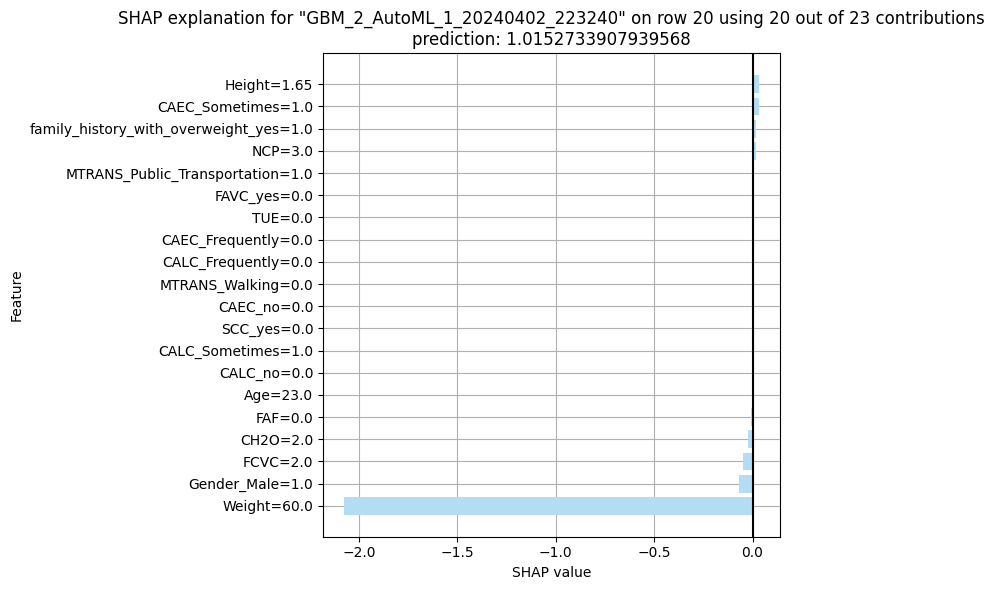

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

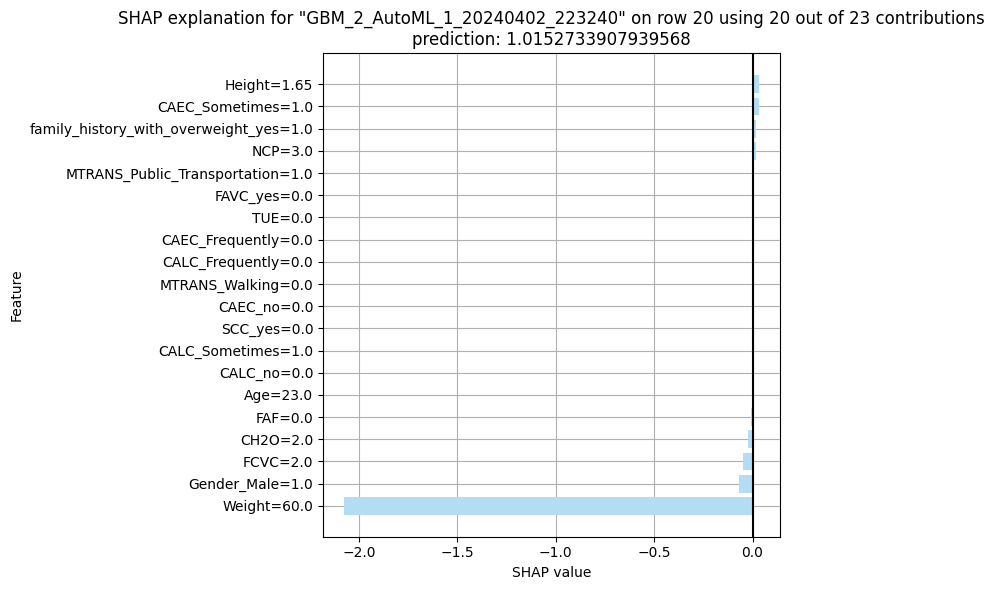

In [ ]:
aml.explain_row(frame = test, row_index = 20, figsize = (8,6), exclude_explanations = "leaderboard")


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                     rmse        mse       mae        rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
-------------------------------------------------------  --------  ---------  --------  -----------  ------------------------  ------------------  -------------------------  ---------------
StackedEnsemble_AllModels_1_AutoML_1_20240402_223240     0.197399  0.0389662  0.119235    0.0824656                 0.0389662                2343                   0.695091  StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_1_20240402_223240  0.201158  0.0404644  0.124225    0.0840342                 0.0404644                1703                   0.249044  StackedEnsemble
GBM_2_AutoML_1_20240402_223240                           0.203007  0.0412119  0.121392    0.0851684                 0.0412119                1078                   0.093862  GBM
GBM_4_AutoML_1_20240402_223240                           0.213234  0.0454689  0.128804    0.0948221                 0.0454689                1898                   0.091729  GBM
GBM_5_AutoML_1_20240402_223240                           0.222411  0.0494666  0.125264    0.0911588                 0.0494666                 777                   0.067882  GBM
GBM_3_AutoML_1_20240402_223240                           0.233245  0.0544032  0.13379     0.0937261                 0.0544032                1053                   0.077897  GBM
XGBoost_2_AutoML_1_20240402_223240                       0.234169  0.0548351  0.133915    0.095223                  0.0548351                2789                   0.019616  XGBoost
XGBoost_grid_1_AutoML_1_20240402_223240_model_2          0.260326  0.0677695  0.156043    0.105901                  0.0677695                 880                   0.027362  XGBoost
XGBoost_grid_1_AutoML_1_20240402_223240_model_1          0.271116  0.0735036  0.174022    0.108159                  0.0735036                 963                   0.017568  XGBoost
GBM_1_AutoML_1_20240402_223240                           0.271839  0.0738964  0.182246    0.127364                  0.0738964                2832                   0.094279  GBM
XGBoost_1_AutoML_1_20240402_223240                       0.280073  0.0784411  0.179145    0.115623                  0.0784411                6389                   0.027188  XGBoost
XGBoost_3_AutoML_1_20240402_223240                       0.288044  0.0829695  0.18087     0.127179                  0.0829695                1762                   0.022972  XGBoost
DRF_1_AutoML_1_20240402_223240                           0.29549   0.0873143  0.158861    0.121831                  0.0873143                1074                   0.029456  DRF
XRT_1_AutoML_1_20240402_223240                           0.304278  0.0925849  0.212188    0.141809                  0.0925849                 963                   0.030794  DRF
GBM_grid_1_AutoML_1_20240402_223240_model_1              0.319013  0.101769   0.213372    0.140492                  0.101769                 1204                   0.202471  GBM
GLM_1_AutoML_1_20240402_223240                           0.447354  0.200126   0.343708  nan                         0.200126                  136                   0.002909  GLM
DeepLearning_1_AutoML_1_20240402_223240                  0.551598  0.30426    0.380828    0.248024                  0.30426                   284                   0.009465  DeepLearning
[17 rows x 9 columns]

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

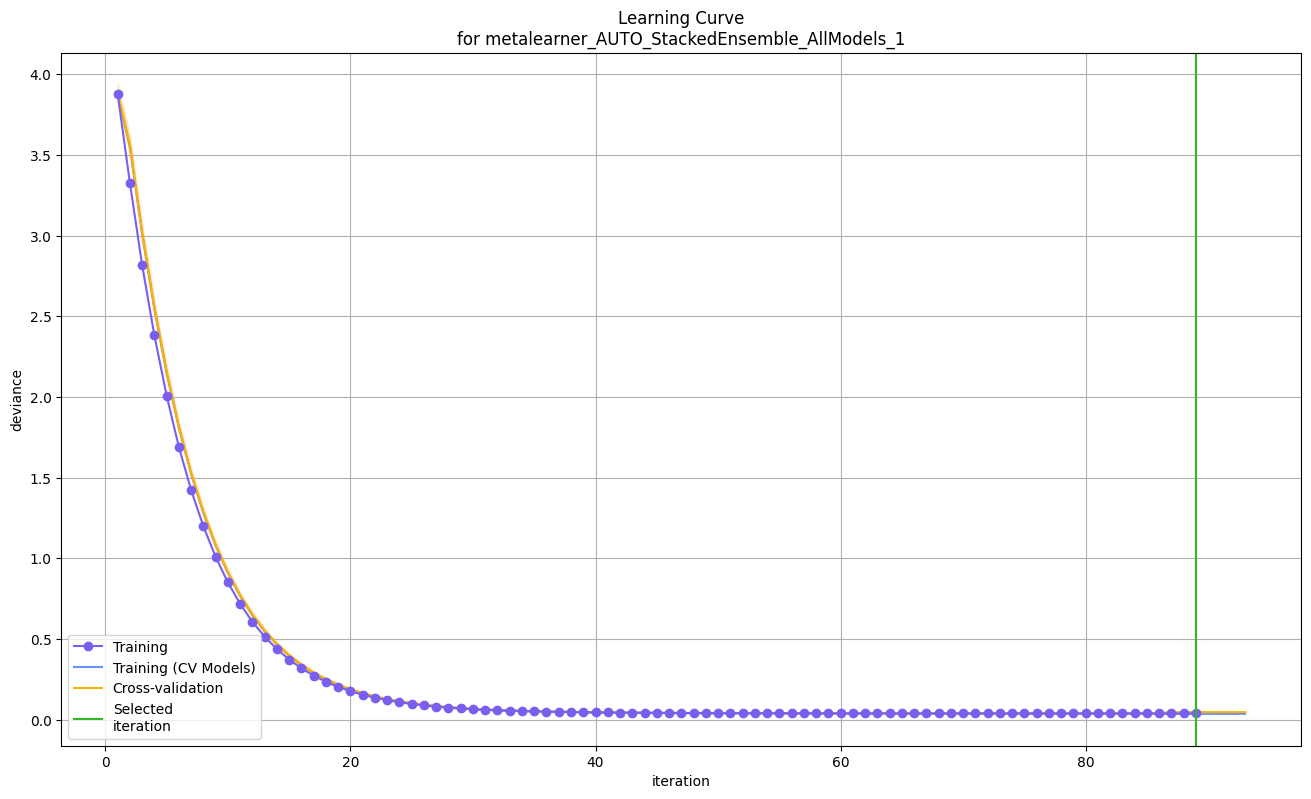

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

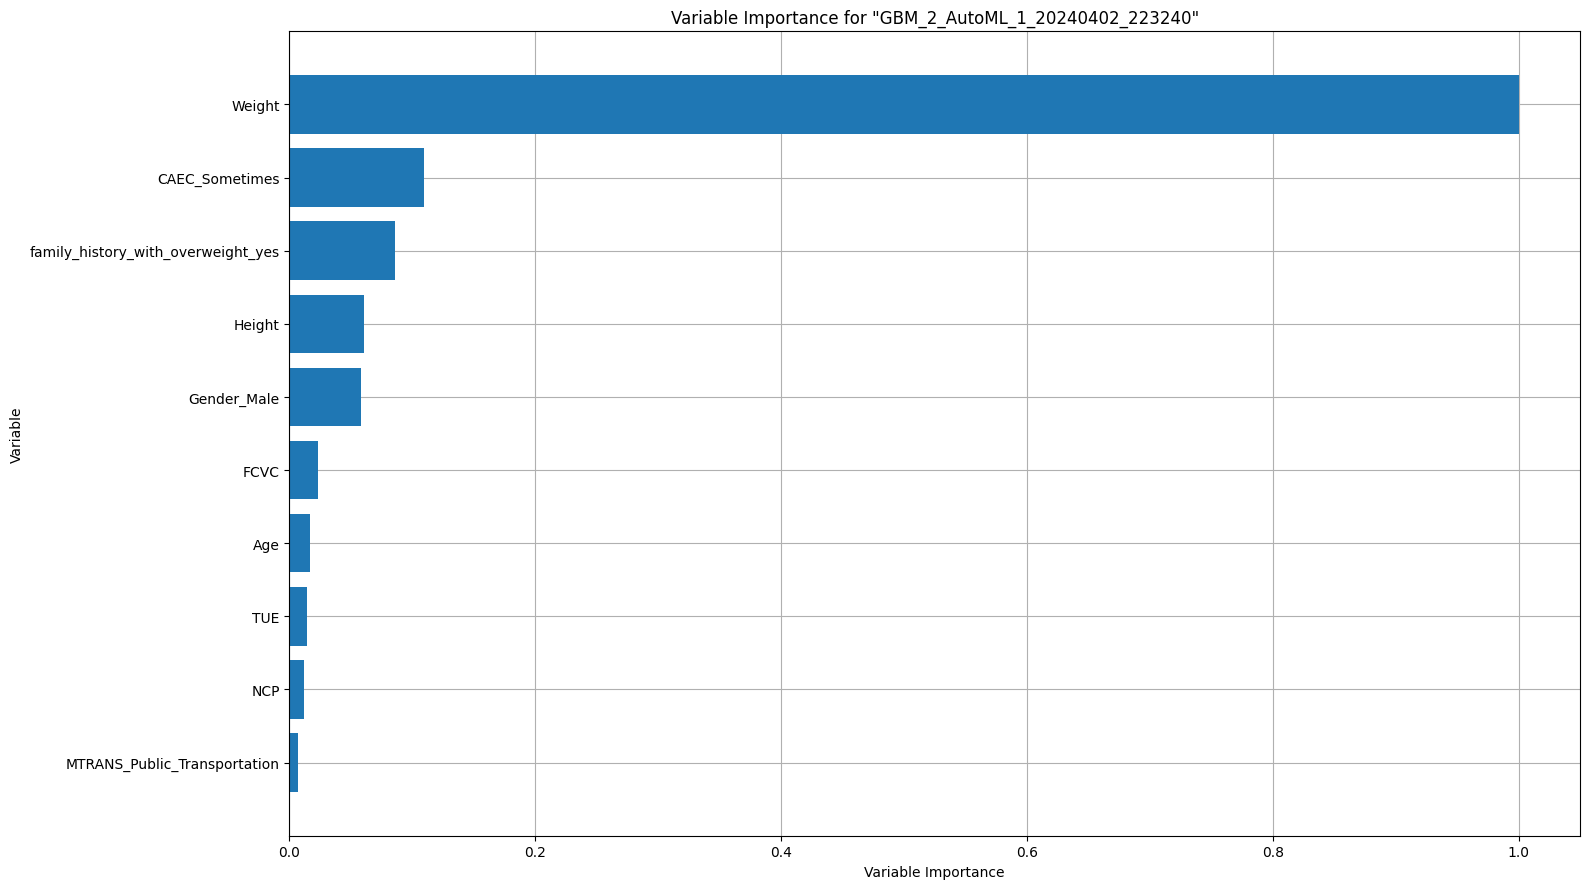

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

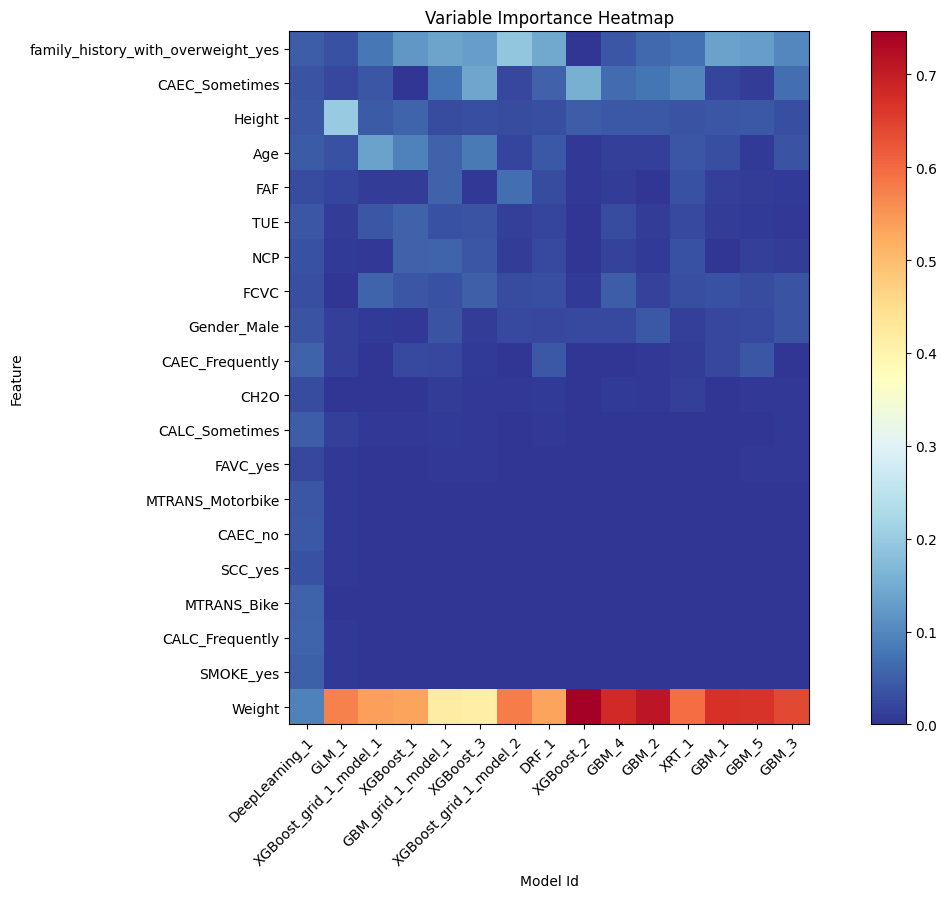

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

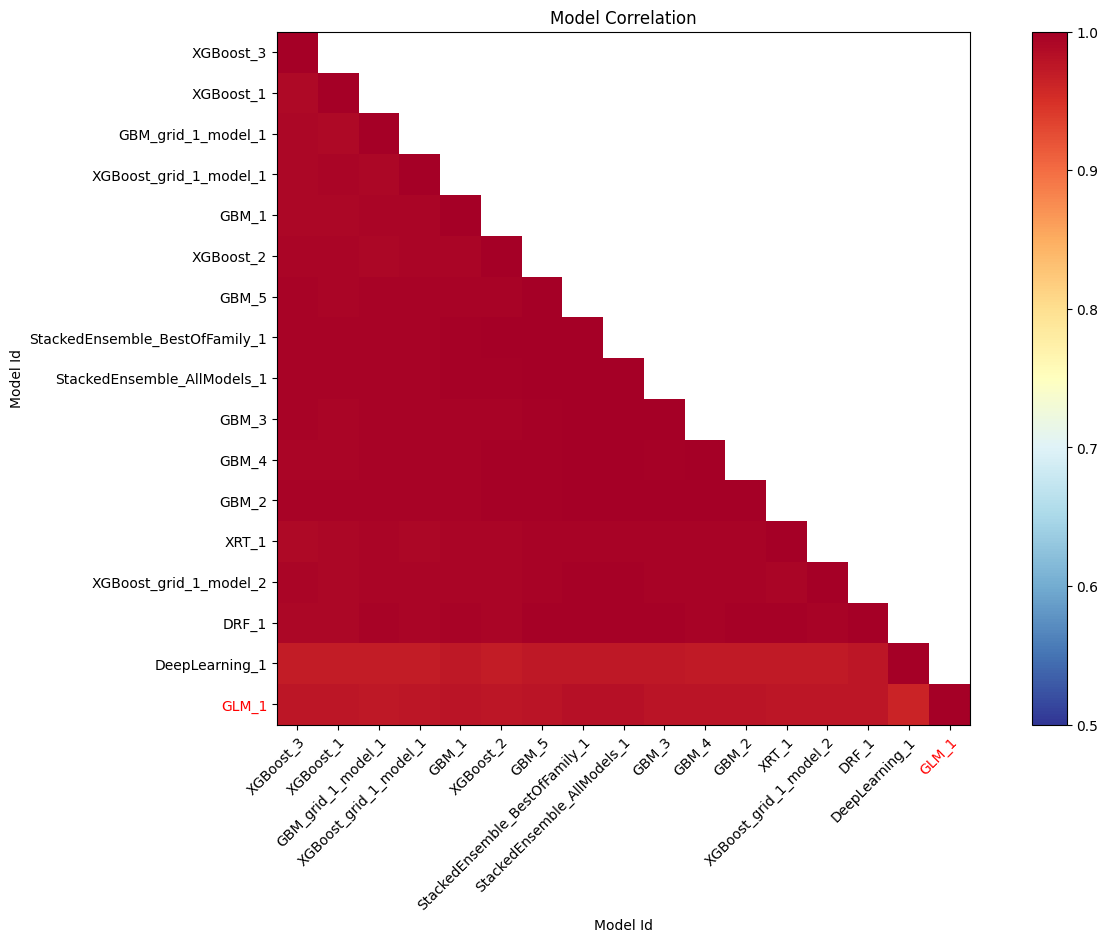

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

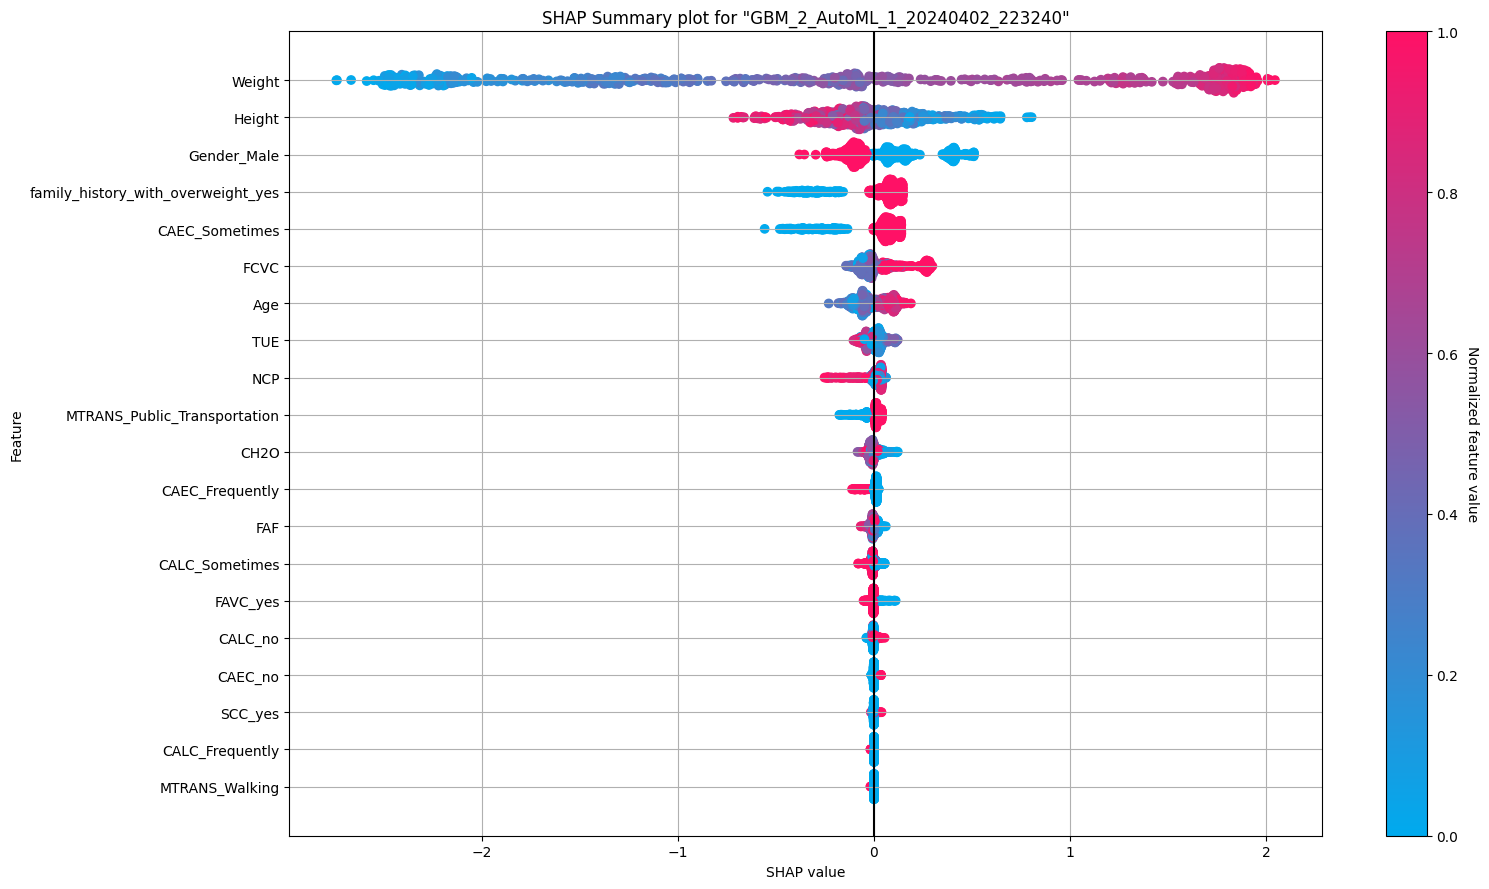

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

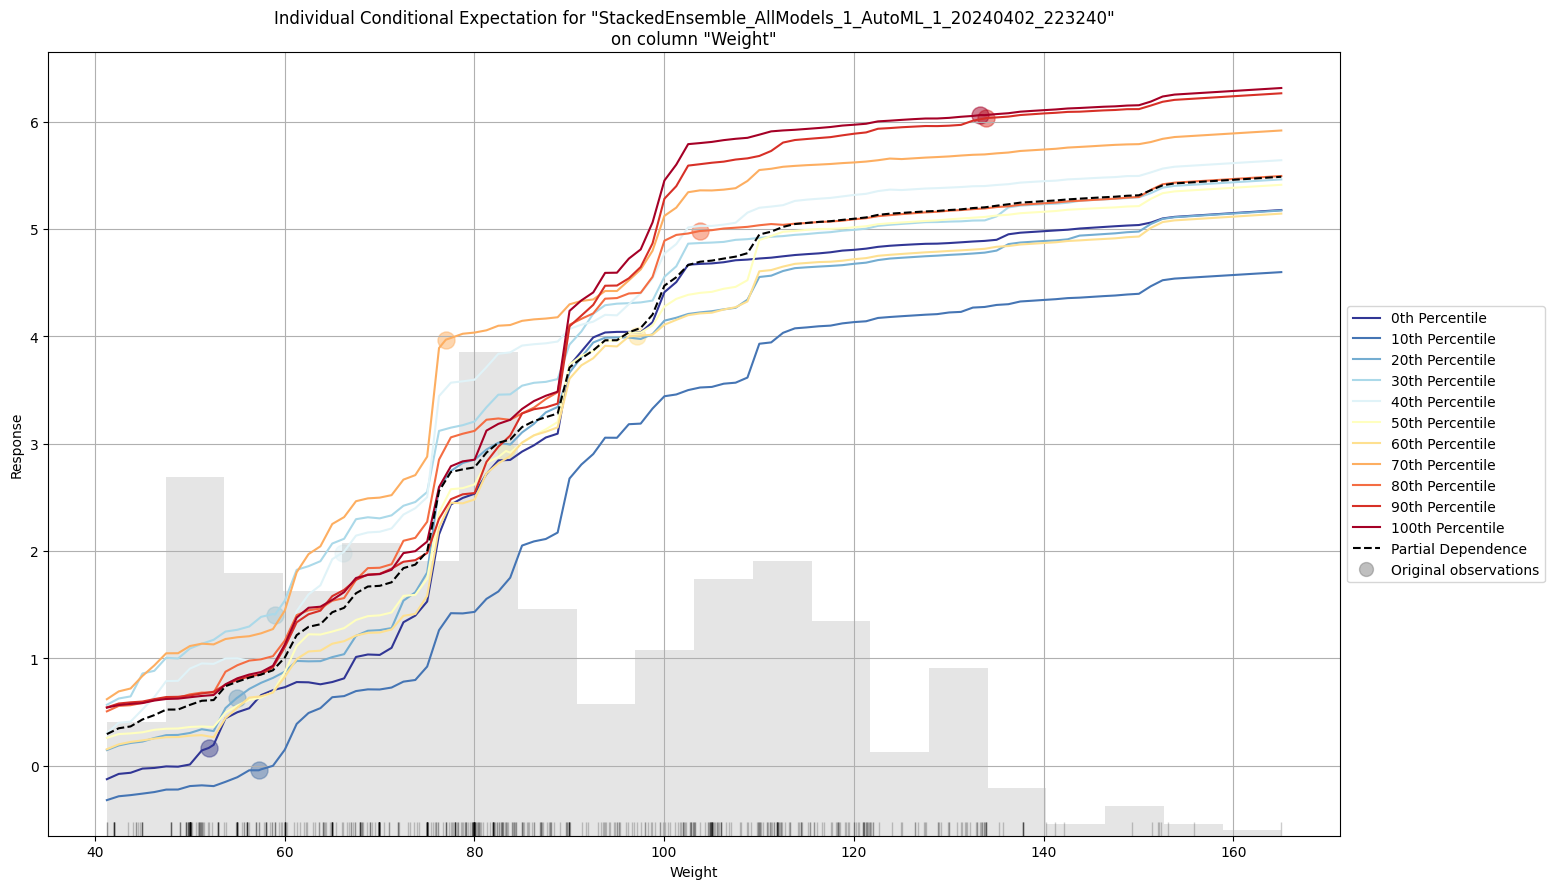

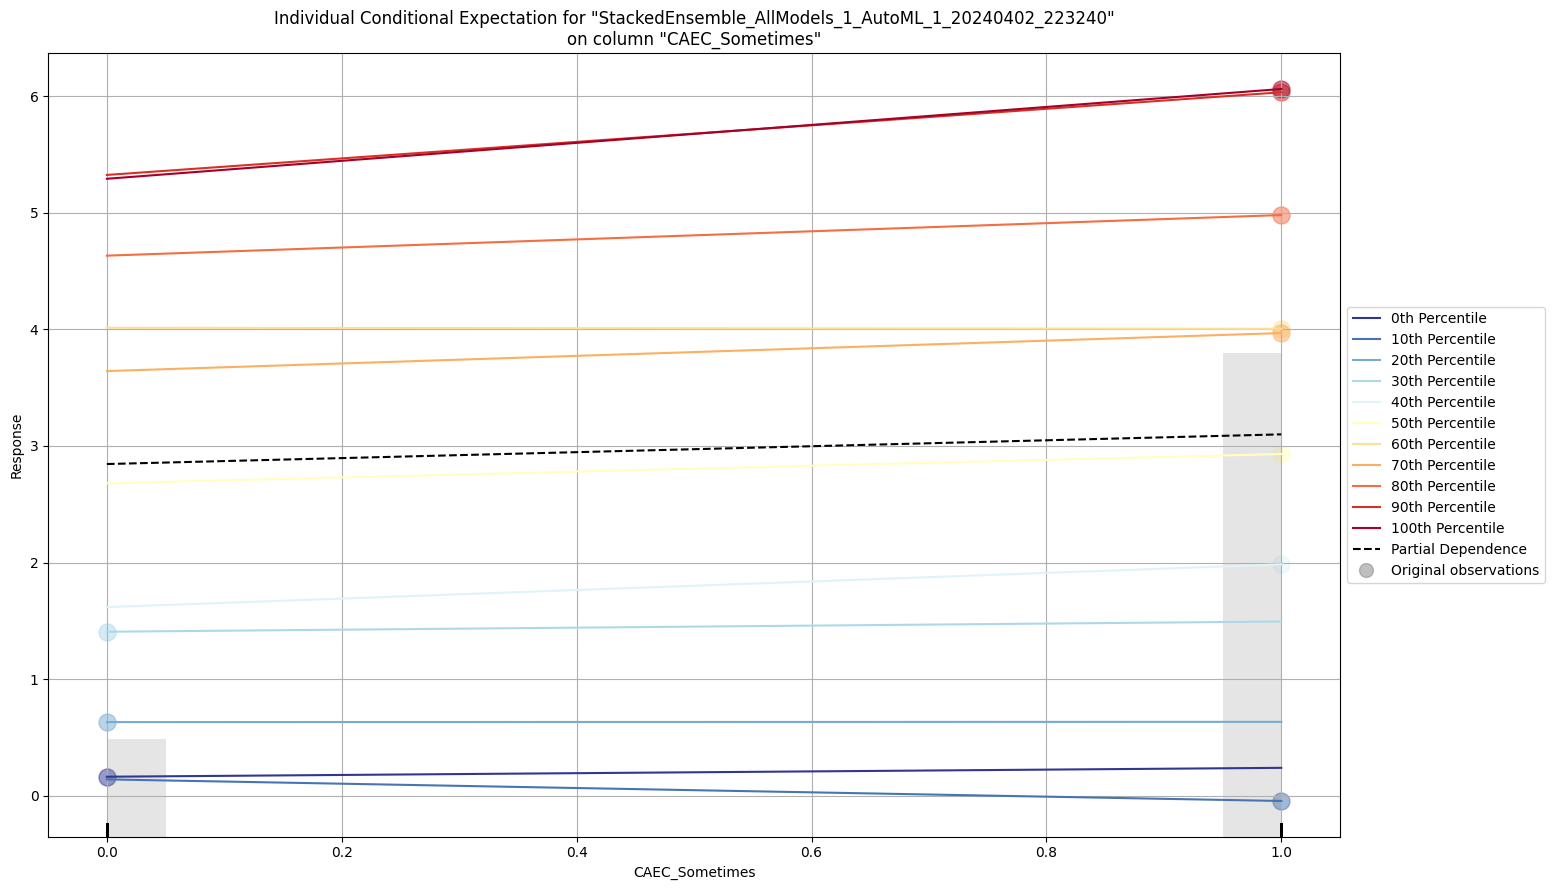

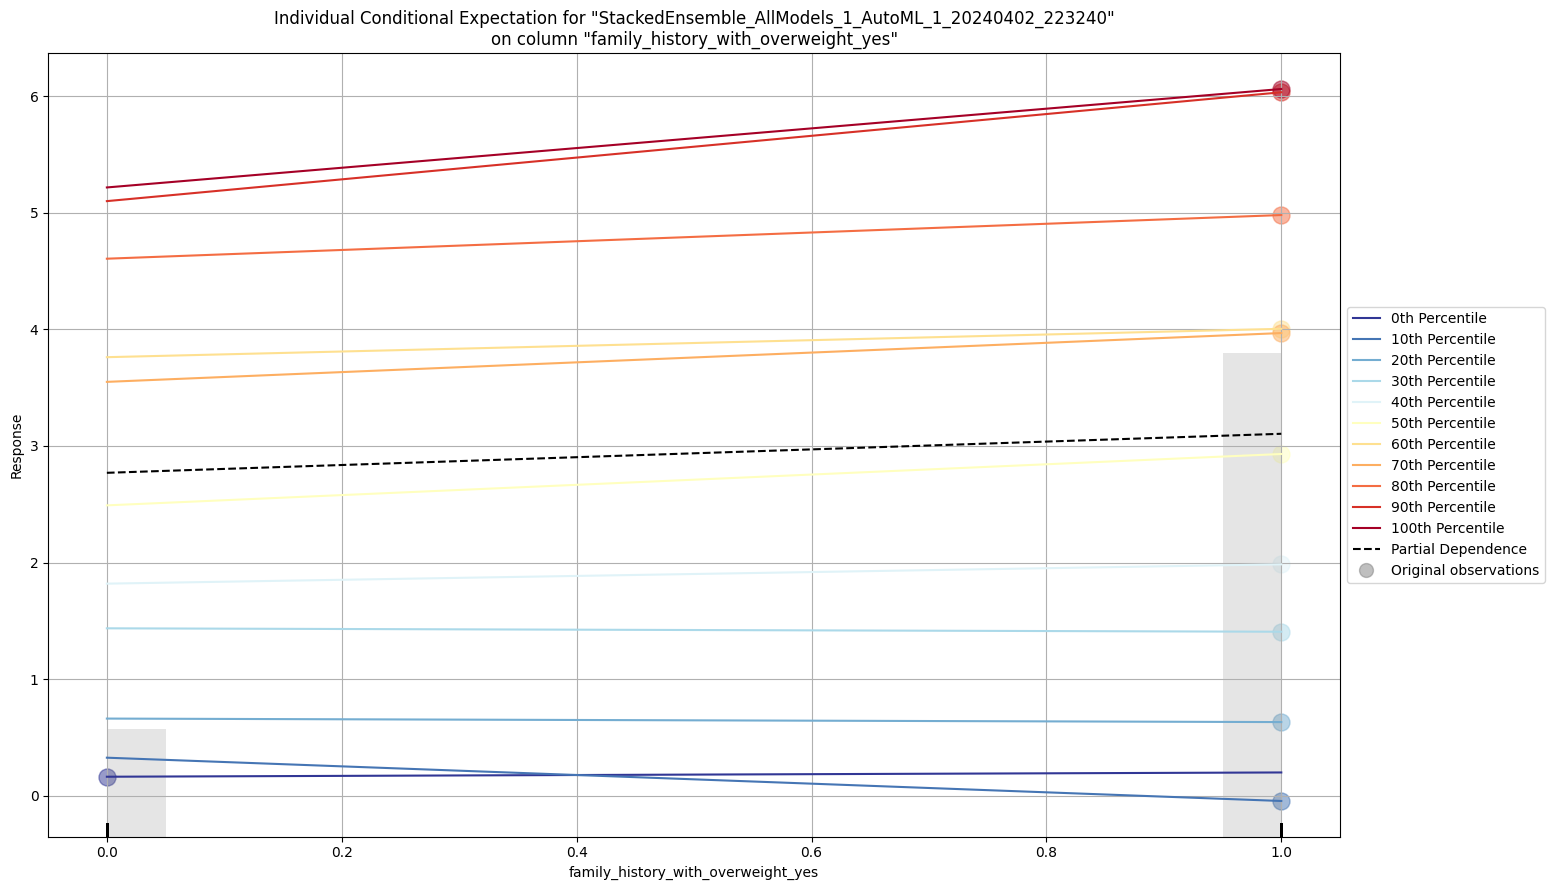

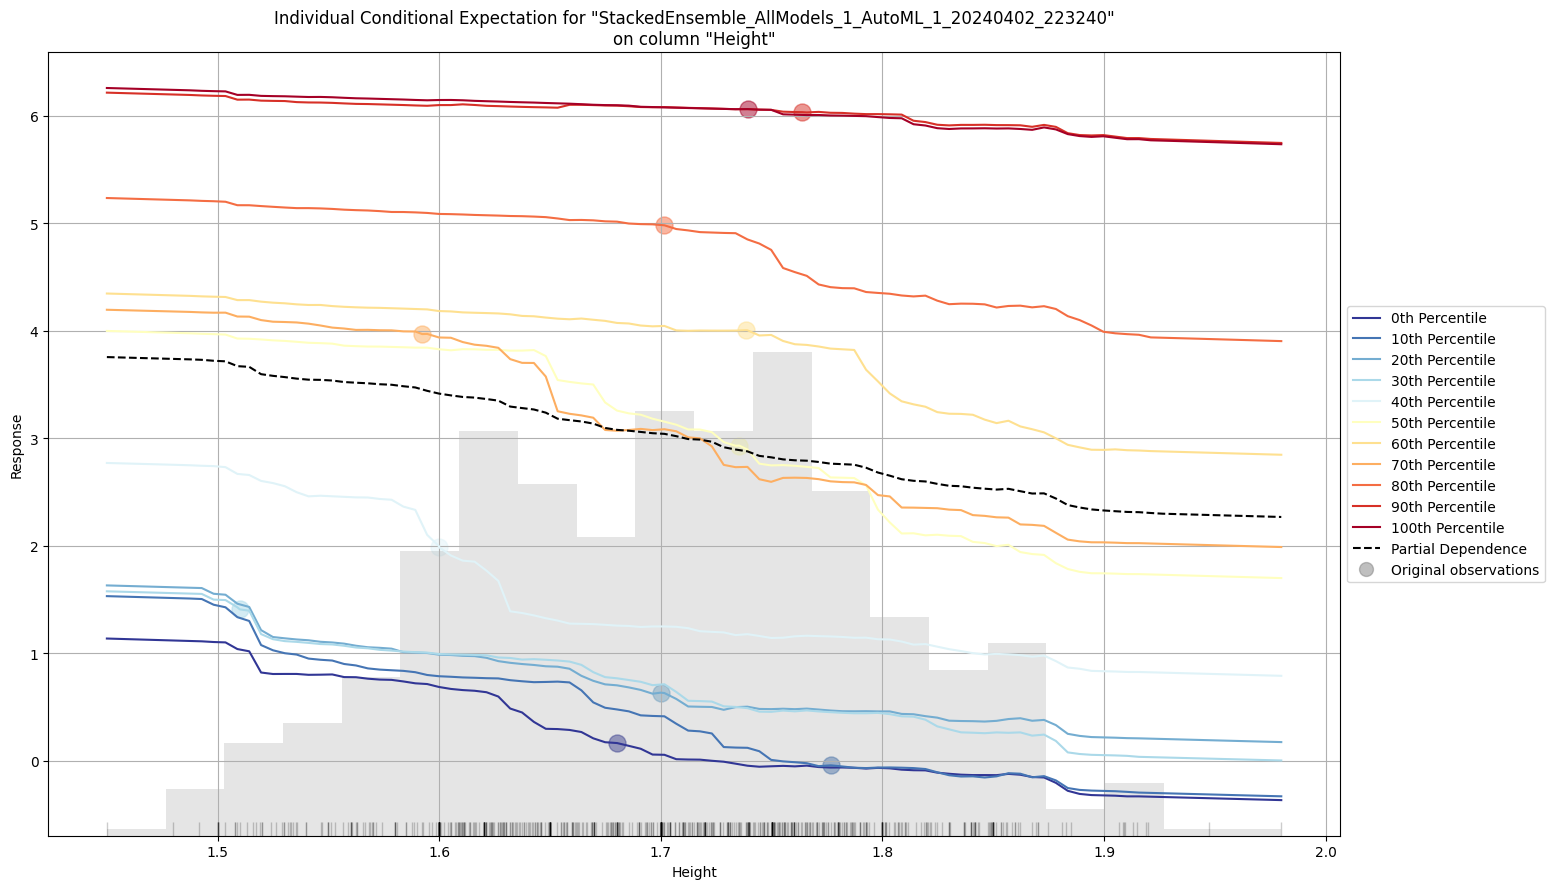

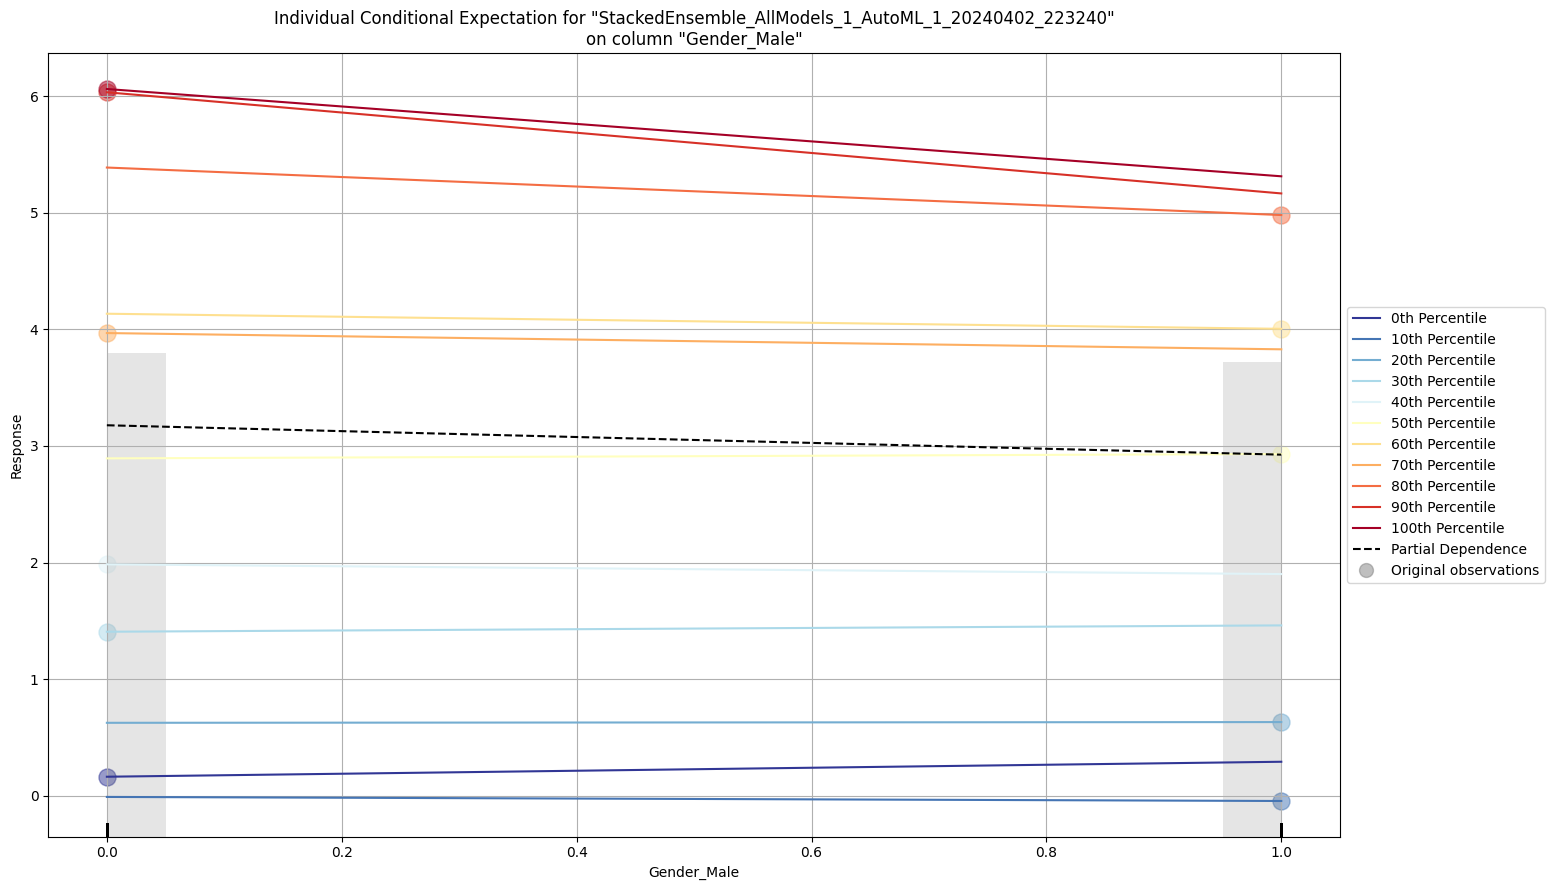

In [ ]:
explanation = aml.explain(test, exclude_explanations=['pdp', 'residual_analysis'])

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

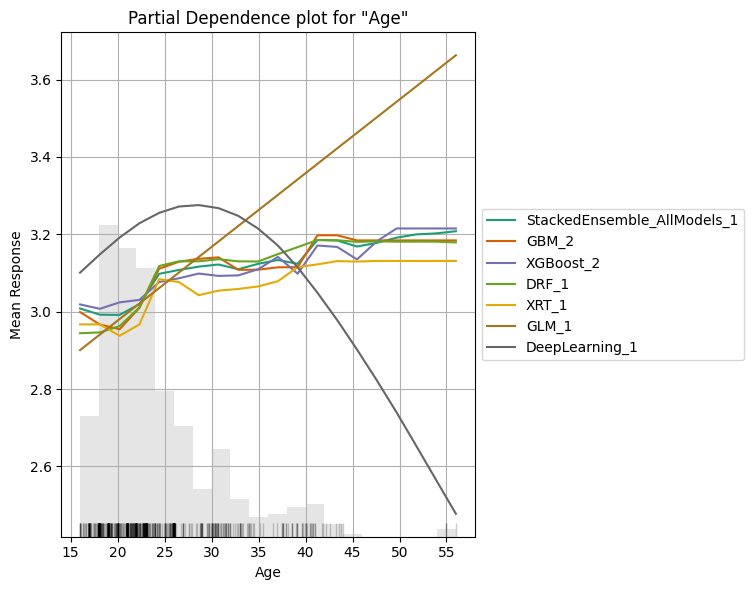

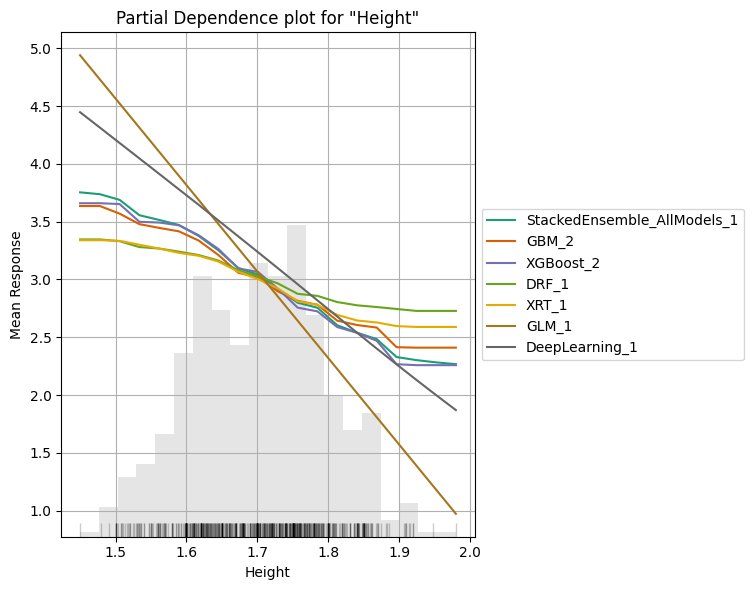

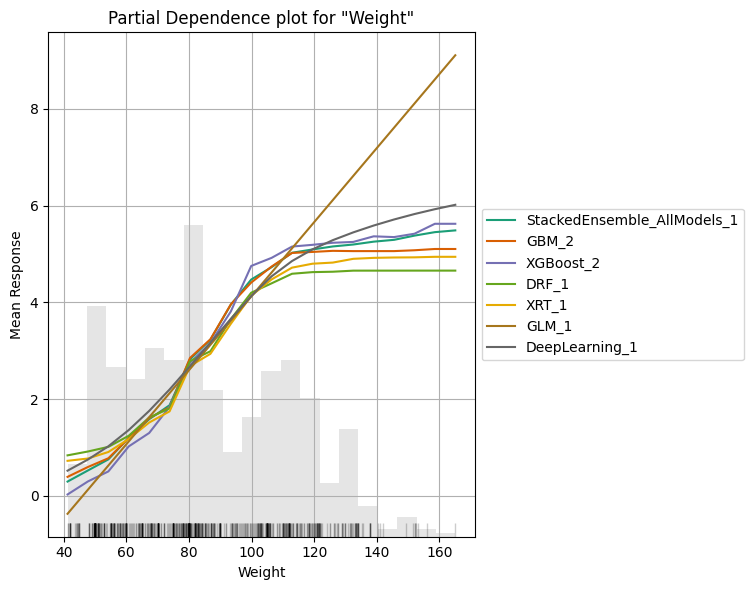

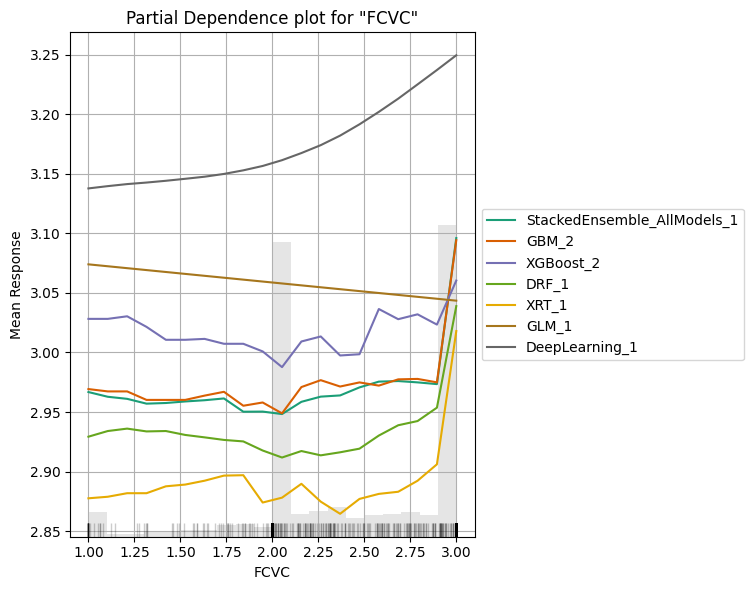

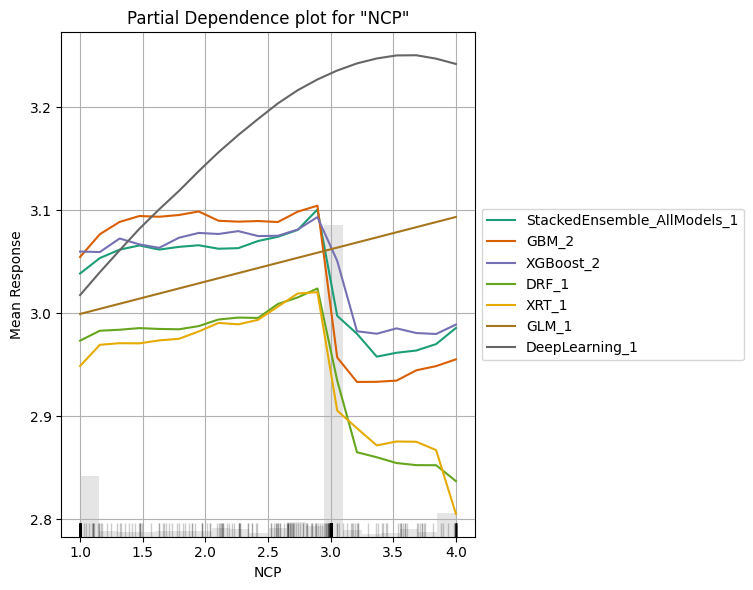

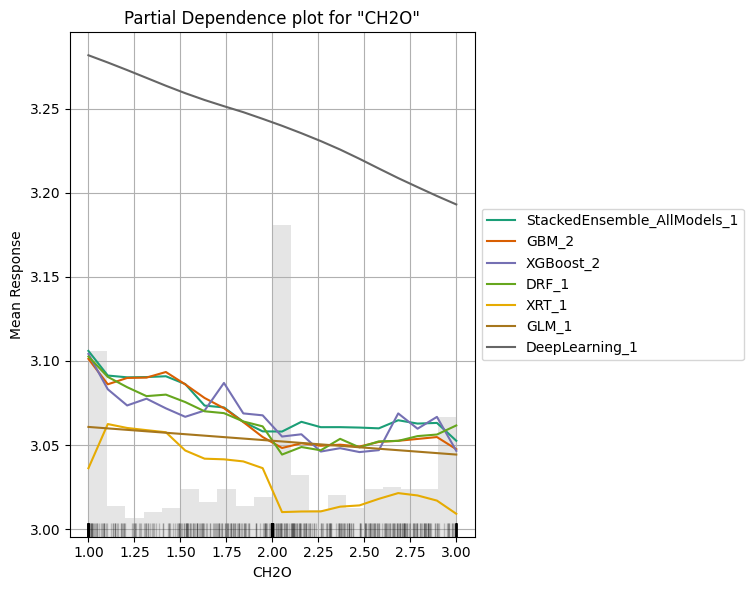

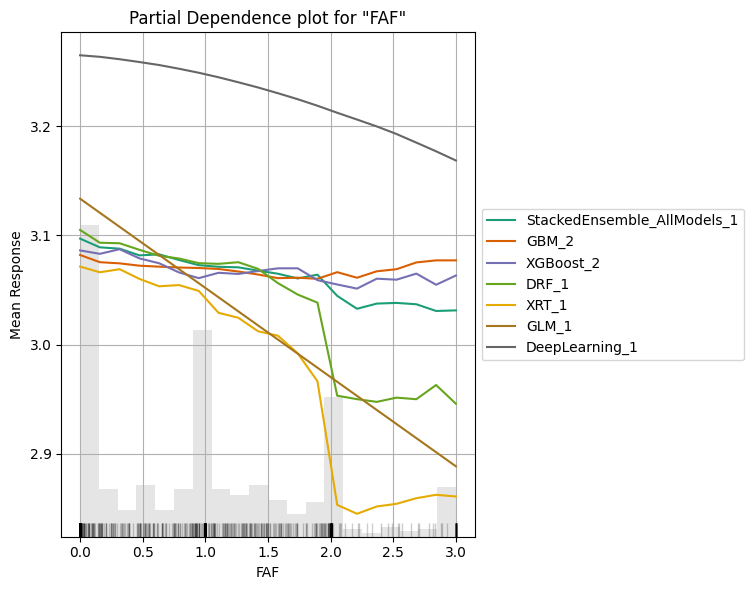

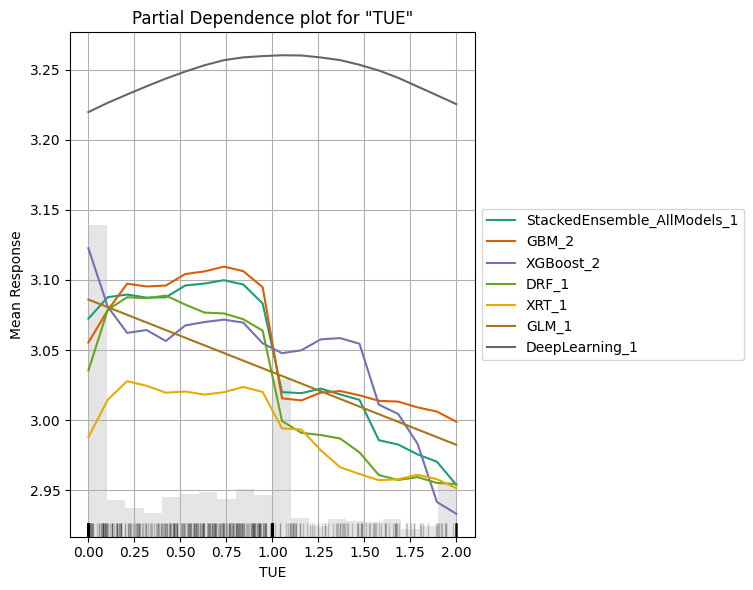

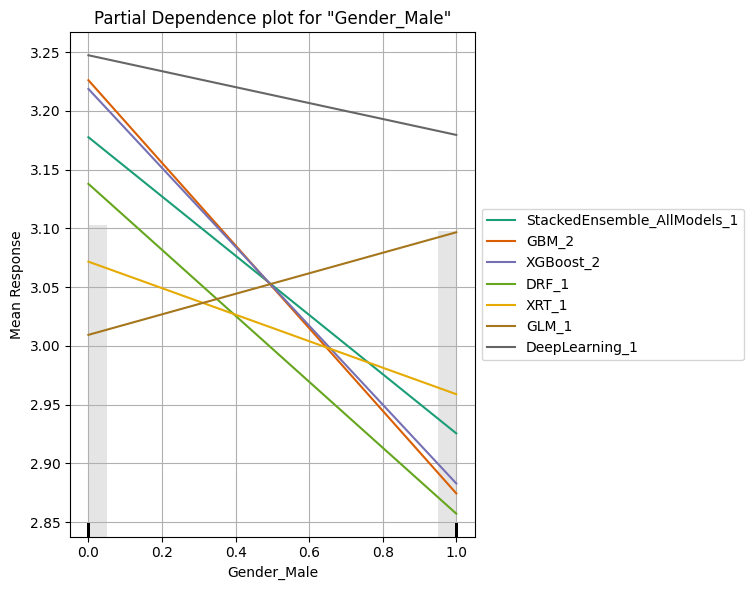

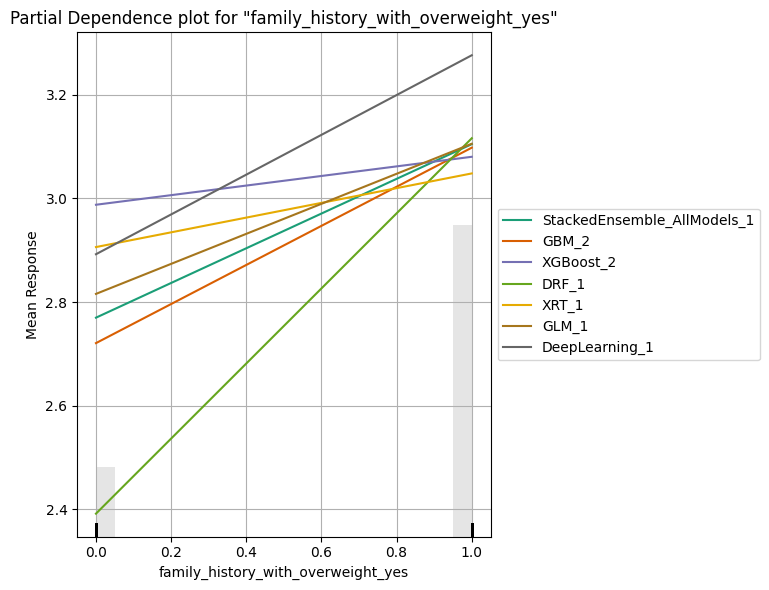

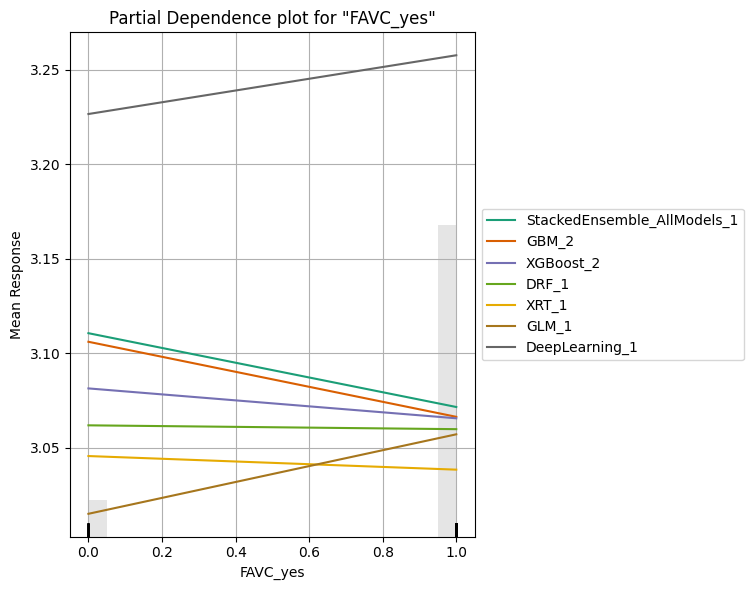

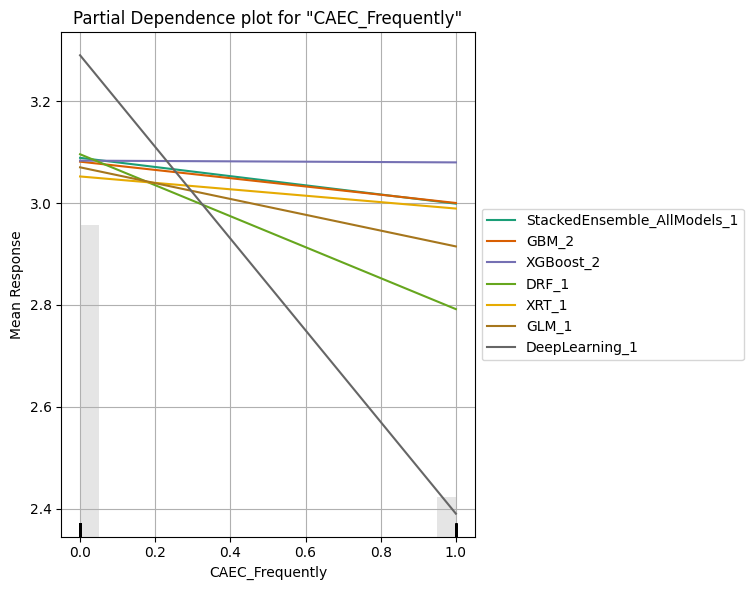

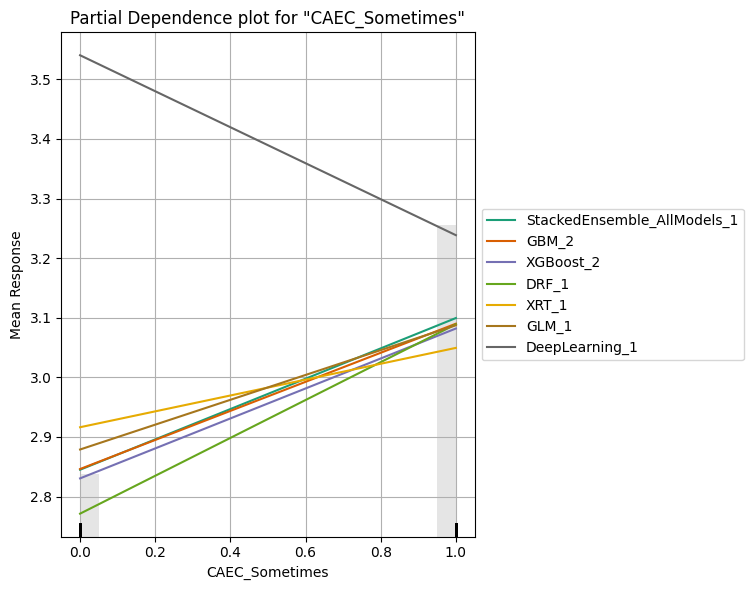

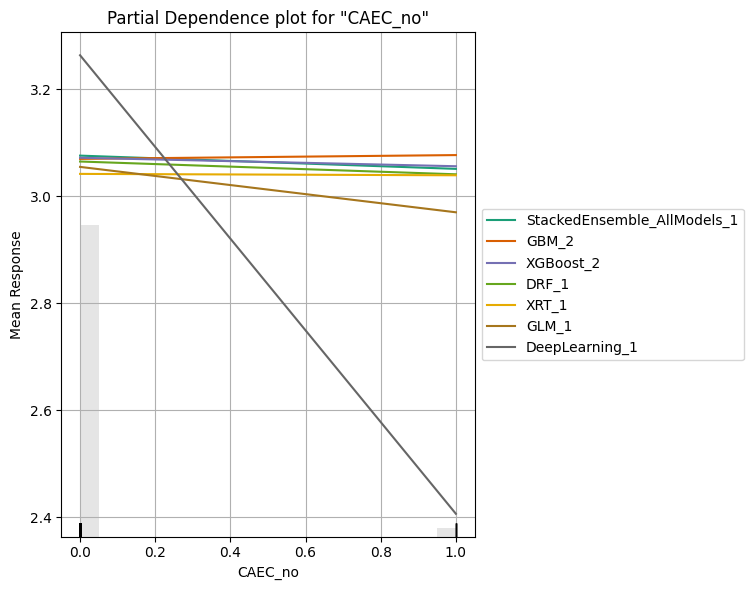

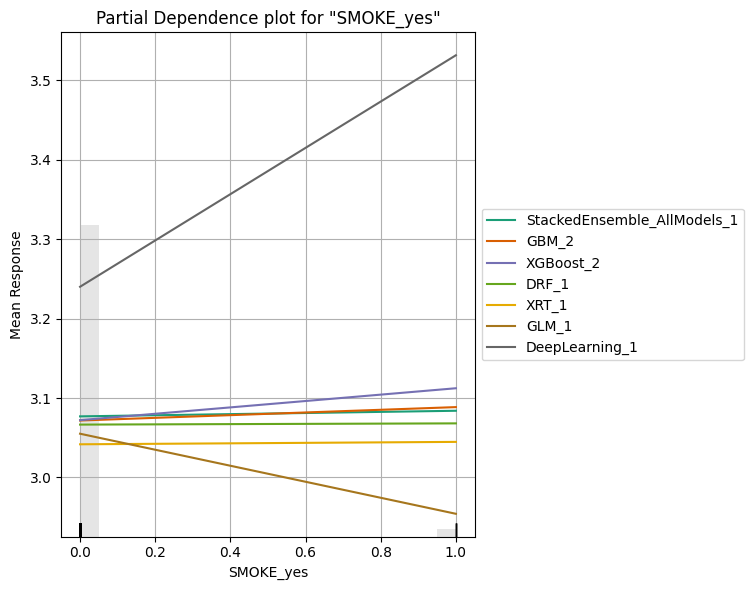

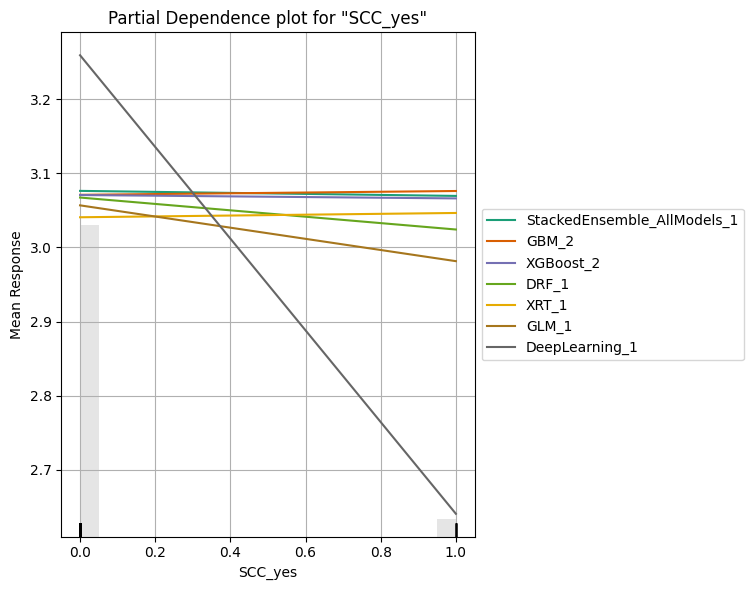

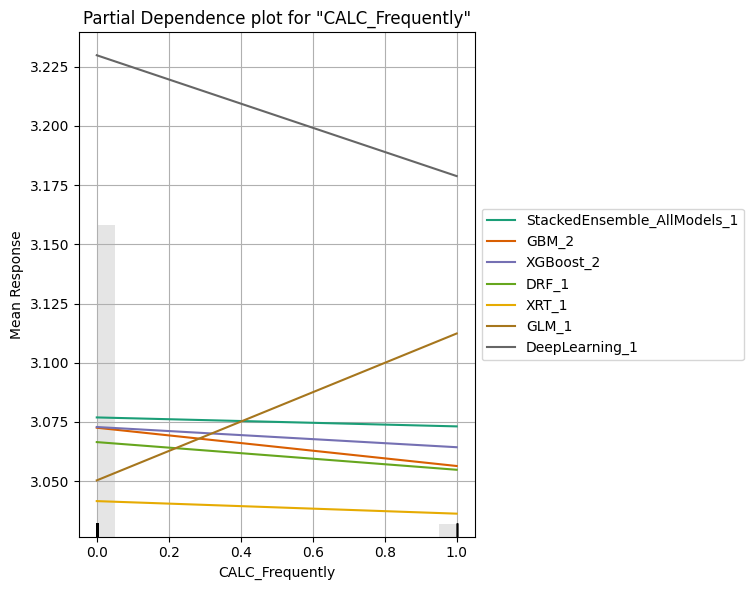

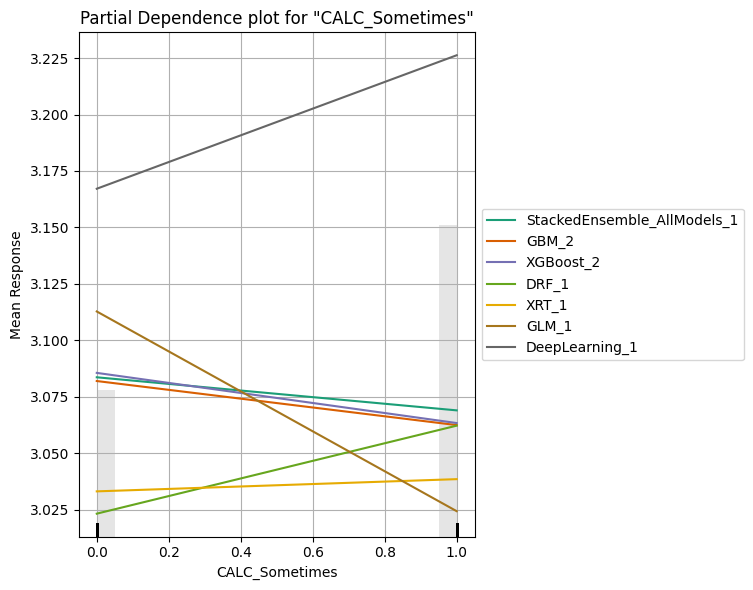

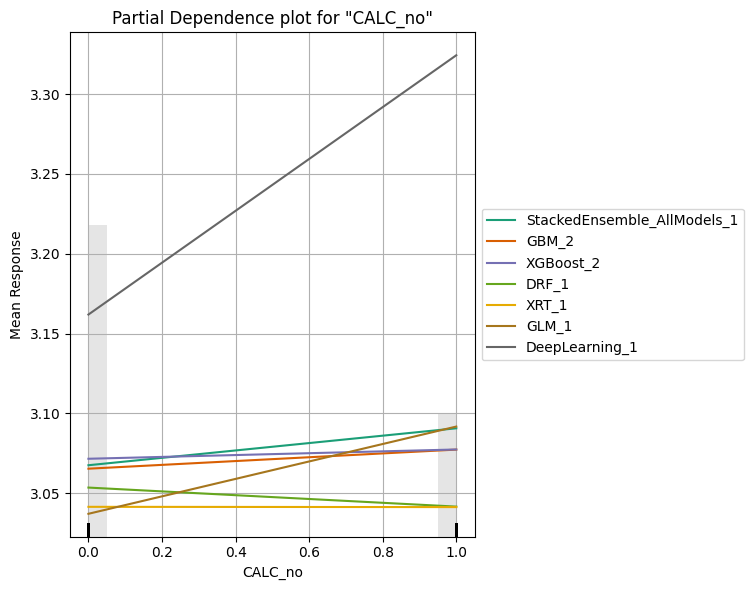

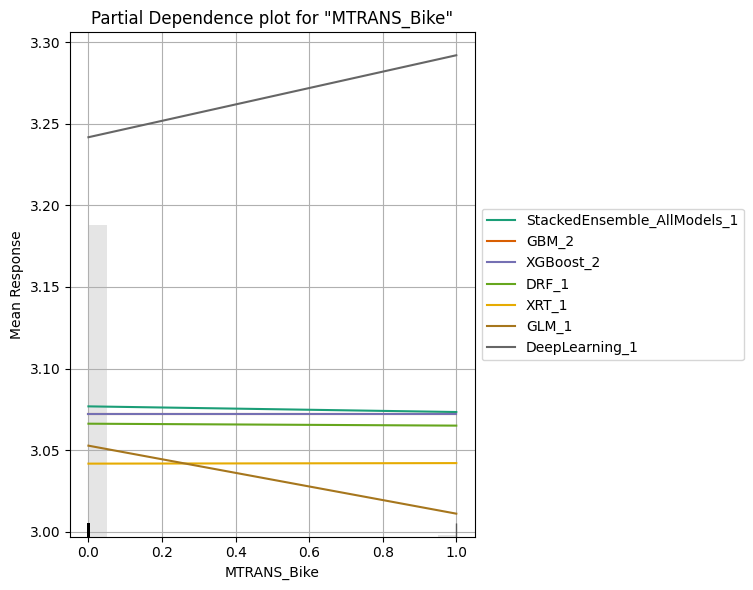

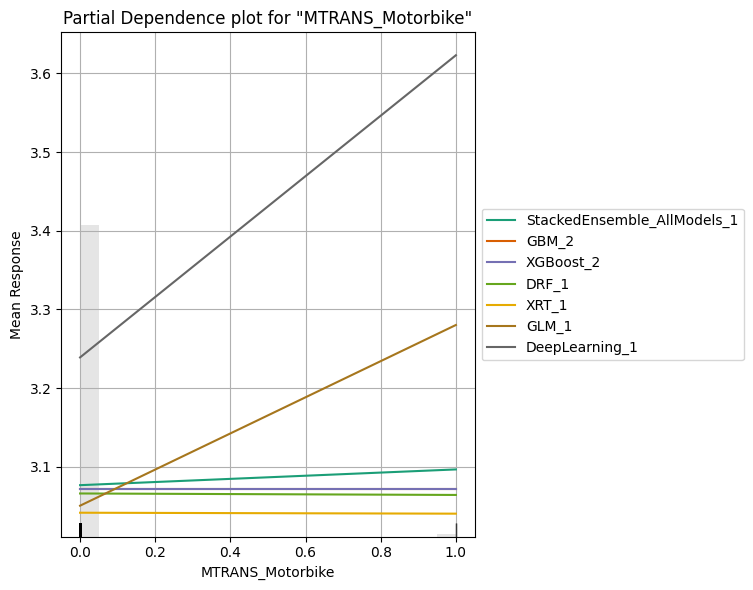

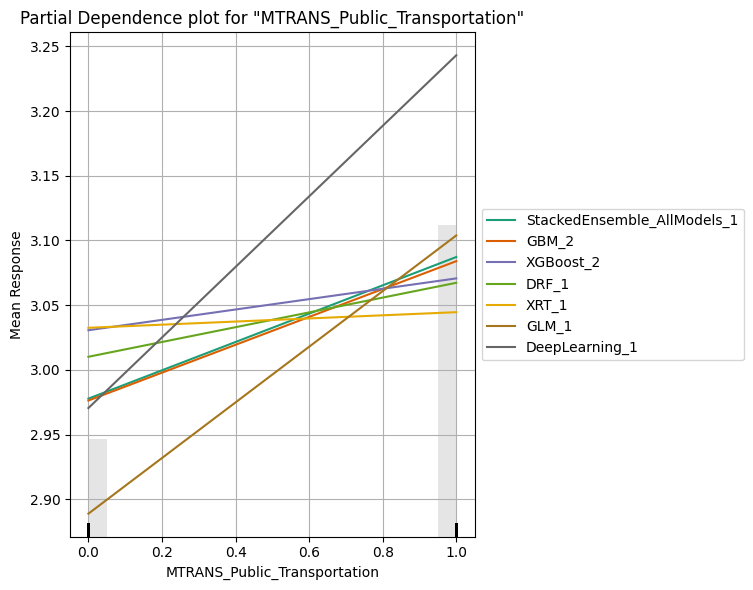

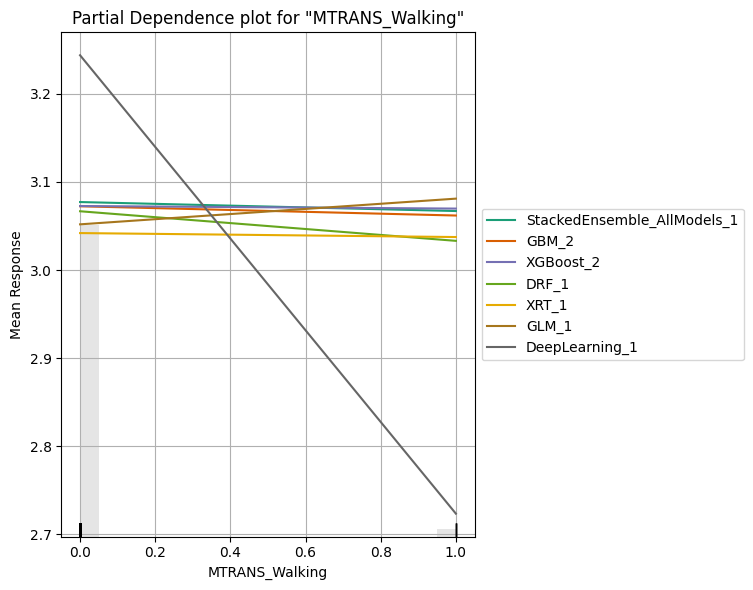

In [ ]:
explain_model = aml.explain(frame = test, figsize = (8,6),include_explanations=['pdp'])

#Answers

Answer the following questions for all of the models:

* Is the relationship significant?



> The best model, a stacked ensemble, demonstrates a highly significant relationship between predictors and the target, evidenced by an R-squared value of 0.9904, indicating that 99.04% of the variance in the target variable is explained by the model. The low Mean Squared Error (MSE) of 0.039 and Root Mean Squared Error (RMSE) of 0.197 further affirm the model's accuracy. These metrics collectively signify the model's strong predictive performance and its effectiveness



* Are any model assumptions violated?


> No,Based on the Stacked Ensemble model, it does not appear that the assumptions typically associated with individual models are being violated. The ensemble approach combines multiple models to make a final prediction, which inherently reduces the risk of violating the assumptions of any single model.




* Is there any multicollinearity in the model?


> The VIF analysis indicates significant multicollinearity within the dataset, notably within the "CALC" variables and also among "Age", "Height", and "Weight", albeit to a lesser extent. The "Age", "Height", and "Weight" variables exhibit moderate VIF scores, suggesting mild multicollinearity that could be considered acceptable in this context. To improve the model's accuracy and reduce potential bias, it might be beneficial to address the pronounced multicollinearity found in the "CALC" variables by either removing, combining them, or applying dimensionality reduction techniques, while closely monitoring the impact on the model.



* In the multivariate models are predictor variables independent of all the other predictor variables?


> The correlation matrix shows that the predictor variables 'Age', 'Height', and 'Weight' have some degree of multicollinearity, with 'Height' and 'Weight' exhibiting a particularly strong correlation. However, these correlations are not so high as to warrant immediate concern, except perhaps for 'Height' and 'Weight'. In predictive modeling, such multicollinearity is often acceptable, especially when the model can handle it, like in tree-based methods or regularized regression included within an ensemble approach.



* In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.


> The SHAP summary and variable importance and other analysis such as pdp suggest that "Weight" is the most significant predictor variable, followed by "Height" and "Gender_Male". These variables have the most substantial impact on the model's predictions. In contrast, variables like "SCC_yes" and "CAEC_no" appear to be less important. For model refinement, you could consider excluding the less important variables to simplify the model and potentially improve its performance.



* Does the model make sense?


> The model's decision-making process, as revealed by the SHAP summary and variable importance plots, aligns with domain knowledge and intuition, suggesting that the model makes sense. The most significant predictors—weight, height, and gender—are well-known factors associated with obesity, which is the target variable. The model's reliance on these predictors is consistent with medical understanding and expectations, indicating that the model's logic is sound and its predictions are based on meaningful data relationships.



* Does regularization help?


> Based on the AutoML leaderboard results, the Stacked Ensemble model, which incorporates regularization through its GLM metalearner, achieved the best performance, suggesting that regularization contributed positively to the ensemble's predictive accuracy.Therefore it did help.



* Which independent variables are significant?


>  Based on the SHAP summary plot,heatmap and variable importance plotthe most significant independent variables affecting the model's predictions are:
Weight: It has the highest impact on the model's prediction, indicating a strong positive relationship with the target variable.
Height: This is the second most important predictor, also showing a strong relationship.
Gender_Male: Being male has a notable impact on the model's prediction, suggesting gender differences are important.
Family_history_with_overweight_yes: This indicates that having a family history of being overweight is a significant predictor.
CAEC_Sometimes: Frequency of high-calorie food consumption labeled as 'sometimes' appears to be an important variable.






* Which hyperparameters are important?



> For the models generated in the AutoML process, the most important hyperparameters that significantly affect model performance include:


>Number of trees (ntrees): Dictates the complexity of the ensemble models like GBM and XGBoost. More trees can capture more complex patterns but may lead to overfitting. Maximum depth of trees (max_depth): Controls how deep the trees can grow and thus affects the model's ability to model interactions.
Learning rate (learn_rate): Particularly important in GBM and XGBoost models, it determines the step size at each iteration while moving toward a minimum of a loss function.
Sample rate (sample_rate): Used in GBM and XGBoost to specify the fraction of data to be used for learning the model. This is akin to the bagging approach in Random Forests.
Column sample rate (col_sample_rate): Specifies the fraction of features to use for each tree in GBM and XGBoost, introducing feature-wise randomness.
Regularization (alpha and lambda in GLM): These are crucial for controlling model complexity and preventing overfitting by penalizing large coefficients.
Hidden layers configuration in Deep Learning: The number and size of hidden layers are key to the model's ability to capture complex relationships.

* Coding professionalism? Yes






In [ ]:
# Get the top model from the leaderboard
top_model = aml.leader
# List all base models of the stacked ensemble
base_models = top_model.metalearner().coef_norm()
print("Base Models:", base_models)
# List of model IDs from your output excluding 'Intercept' and models with a coefficient of 0.0
model_ids = [model_id for model_id, coef in base_models.items() if coef != 0.0 and model_id != 'Intercept']


for model_id in model_ids:
    # Retrieve each model by its ID
    model = h2o.get_model(model_id)
    # Print the model type and its hyperparameters
    print(f"Model ID: {model_id}")
    print("Model Type:", model.algo)
    print("Hyperparameters:", model.params)
    print("\n---\n")

Base Models: {'Intercept': 3.127759197324412, 'GBM_2_AutoML_1_20240402_223240': 0.5969075120825792, 'GBM_4_AutoML_1_20240402_223240': 0.5637775089626827, 'GBM_5_AutoML_1_20240402_223240': 0.385103911061976, 'GBM_3_AutoML_1_20240402_223240': 3.336370121225185e-06, 'XGBoost_2_AutoML_1_20240402_223240': 0.26646458462076056, 'GBM_1_AutoML_1_20240402_223240': 0.0, 'DRF_1_AutoML_1_20240402_223240': 0.0, 'XRT_1_AutoML_1_20240402_223240': 1.9124552989052336e-06, 'XGBoost_3_AutoML_1_20240402_223240': 0.0, 'GBM_grid_1_AutoML_1_20240402_223240_model_1': 0.0, 'XGBoost_grid_1_AutoML_1_20240402_223240_model_2': 0.0, 'XGBoost_1_AutoML_1_20240402_223240': 0.0, 'GLM_1_AutoML_1_20240402_223240': 0.13349408249999306, 'XGBoost_grid_1_AutoML_1_20240402_223240_model_1': 1.0602261092306039e-06, 'DeepLearning_1_AutoML_1_20240402_223240': 0.019208235511268303}
Model ID: GBM_2_AutoML_1_20240402_223240
Model Type: gbm
Hyperparameters: {'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'sch

#Conclusion from AutoML


The analysis leveraging AutoML and H2O.ai highlighted the efficacy of automated machine learning in predictive modeling. The stacked ensemble model, identified as the best performer with a significant R-squared value of 0.9904, exemplifies the strong predictive capability of AutoML-generated models. Key predictors identified—such as "Weight," "Height," and "Gender_Male"—underscore the model's reliance on meaningful variables, aligning with domain knowledge.

Multicollinearity analysis revealed areas for optimization, notably among the "CALC" variables, suggesting a path forward for model refinement. The use of regularization techniques within the ensemble model significantly contributed to its predictive accuracy, demonstrating the value of these methods in enhancing model performance.

This project showcases AutoML's potential to simplify complex analytical processes, enabling robust predictive modeling with minimal manual intervention. Future efforts may focus on exploring advanced feature engineering and alternative modeling strategies to further improve accuracy.

#Model Interpretability


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
# Assuming 'NObeyesdad' is your target variable and other columns are features
X = obesity_data.drop(columns=['NObeyesdad'])
y = obesity_data['NObeyesdad']
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

# Display the coefficients of the logistic regression model
coefficients = pd.DataFrame(log_reg.coef_[0], X.columns, columns=['Coefficient'])
print(coefficients)

Accuracy: 0.8297872340425532
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        56
           1       0.89      0.53      0.67        62
           2       0.68      0.79      0.73        56
           3       0.67      0.68      0.67        50
           4       0.90      0.81      0.85        78
           5       0.88      1.00      0.94        58
           6       0.94      1.00      0.97        63

    accuracy                           0.83       423
   macro avg       0.83      0.83      0.82       423
weighted avg       0.84      0.83      0.82       423

                                    Coefficient
Age                                    0.070400
Height                                 7.967583
Weight                                -0.504778
FCVC                                   1.269834
NCP                                    1.113035
CH2O                                   0.574197
FAF                                   

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The regression coefficients:

Age: For every one unit increase in age, the log-odds of the target class increase by 0.0704.

Height: A one unit increase in height is associated with an increase of approximately 7.9676 in the log-odds of the target class.

Weight: Each one unit increase in weight results in a decrease of approximately 0.5048 in the log-odds of the target class.

FCVC (Frequency of consumption of vegetables): A one unit increase in FCVC leads to an increase of approximately 1.2698 in the log-odds of the target class.

NCP (Number of main meals): Increasing NCP by one unit increases the log-odds of the target class by approximately 1.1130.

CH2O (Consumption of water): Each one unit increase in CH2O corresponds to an increase of approximately 0.5742 in the log-odds of the target class.

Accuracy of Decision Tree Classifier: 0.6335697399527187


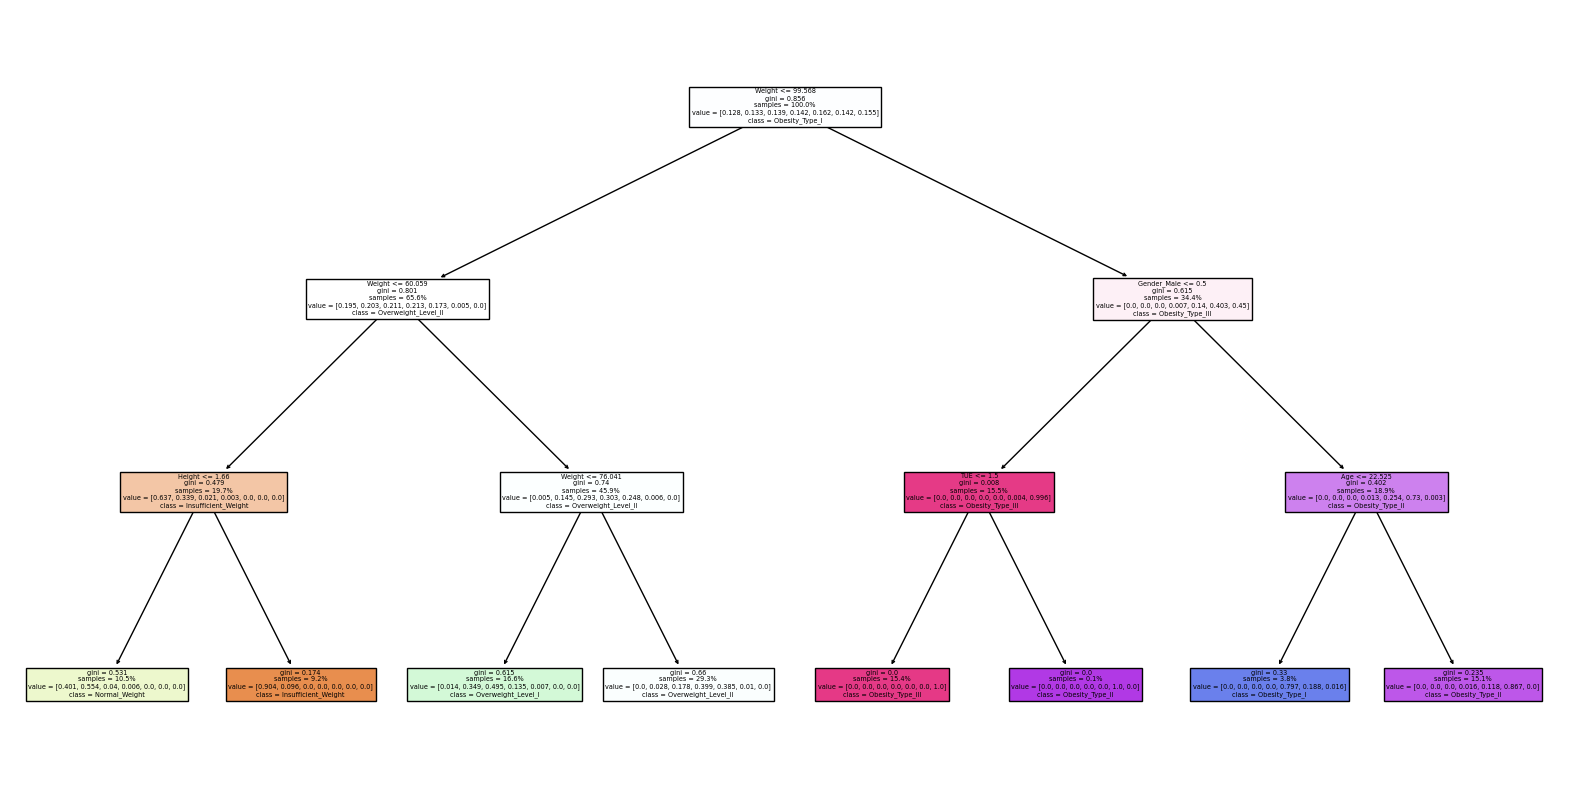

In [ ]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Initialize the Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42, max_depth=3)  # Limiting depth for simplicity

# Fit the model
dt_clf.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_clf.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy of Decision Tree Classifier: {accuracy_dt}')

# Plotting the tree
plt.figure(figsize=(20,10))
plot_tree(dt_clf, filled=True, feature_names=X.columns, class_names=['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'], proportion=True)
plt.show()


Root Node: This is the top-most node from which the tree starts. In your case, it's split based on the 'Weight' feature at a value of ≈80.953, separating the samples into two groups depending on whether their weight is less than or greater than this value. The samples attribute indicates the number of samples at that node, the value attribute gives the distribution of the samples across different classes, and the class attribute indicates the most prevalent class at that node.

Intermediate Nodes: These are the nodes that further split the data into subgroups. For instance, one of the intermediate nodes uses 'Height' as the splitting feature at a value of ≈1.75m, again partitioning the samples into two branches.

Leaf Nodes: These are the final nodes that do not split any further, representing the decision outcomes. Each leaf node provides a class prediction based on the paths taken to reach that node. For example, a leaf node in your tree predicts the class 'Normal_Weight' for samples that end up there, based on the conditions from the root to that leaf.

In [ ]:
pip install shap

In [ ]:
# View the AutoML Leaderboard
lb = aml.leaderboard
print(lb.head(rows=lb.nrows))  # Print all rows (models) of the leaderboard

# The leader model is the best performing model
leader_model = aml.leader

model_id                                                     rmse        mse       mae        rmsle    mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20240402_223240     0.197251  0.0389081  0.119511    0.0831618                 0.0389081
StackedEnsemble_BestOfFamily_1_AutoML_1_20240402_223240  0.203218  0.0412977  0.123554    0.0853798                 0.0412977
GBM_2_AutoML_1_20240402_223240                           0.206745  0.0427433  0.121199    0.0874199                 0.0427433
GBM_4_AutoML_1_20240402_223240                           0.209996  0.0440982  0.130979    0.0877536                 0.0440982
GBM_5_AutoML_1_20240402_223240                           0.218375  0.0476877  0.126929    0.0941485                 0.0476877
GBM_3_AutoML_1_20240402_223240                           0.227682  0.0518392  0.13594     0.0961634                 0.0518392
XGBoost_2_AutoML_1_20240402_223240                       0.236582  0.0559711  0.139671    0.0967051                 0.

StackedEnsemble_AllModels_1_AutoML_1_20240318_25859 model is the best performing model from your AutoML run. This is inferred from it having the lowest mean per class error, log loss, RMSE, and MSE among all the models listed, which suggests that it is the most accurate and makes the fewest errors in prediction across all classes. Stacked ensembles generally yield strong performance by effectively combining the strengths of various underlying models. This particular ensemble uses all the models generated during the AutoML process, leveraging their collective predictions to arrive at a more accurate final prediction.

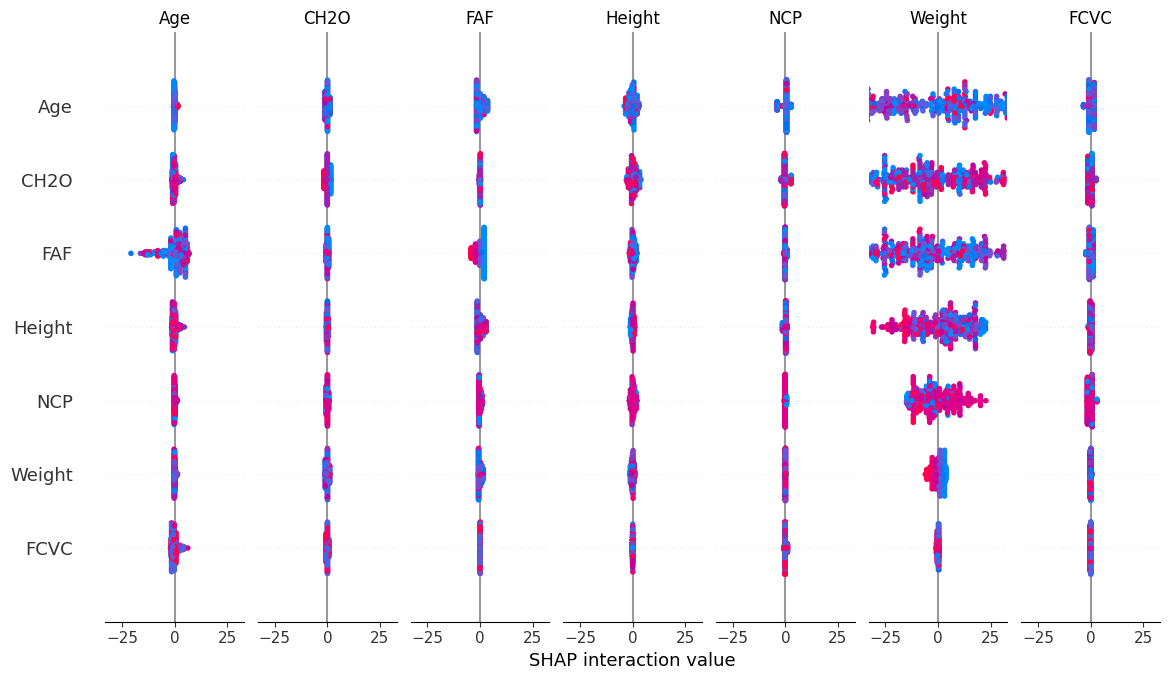

In [ ]:

import shap

# Initialize the explainer with the logistic regression model
explainer = shap.Explainer(log_reg, X_train)

# Compute SHAP values
shap_values = explainer.shap_values(X_test)

# Summarize the SHAP values in a plot (e.g., a summary plot)
shap.summary_plot(shap_values, X_test)


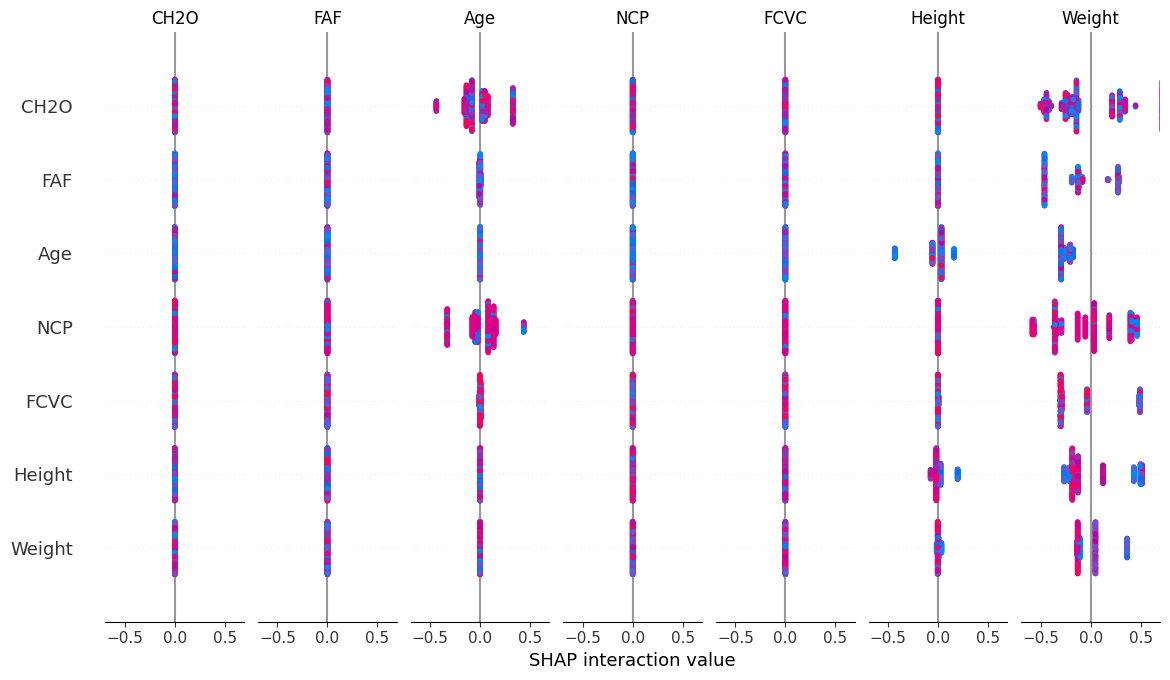

In [ ]:
import shap
import pandas as pd

# Convert X_test into a DataFrame if it's not already in DataFrame format
X_test_df = pd.DataFrame(X_test)

# Initialize the SHAP explainer with the Decision Tree model
explainer = shap.Explainer(dt_clf, X_train)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test_df)

# Visualize the SHAP values with a summary plot
shap.summary_plot(shap_values, X_test_df)

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

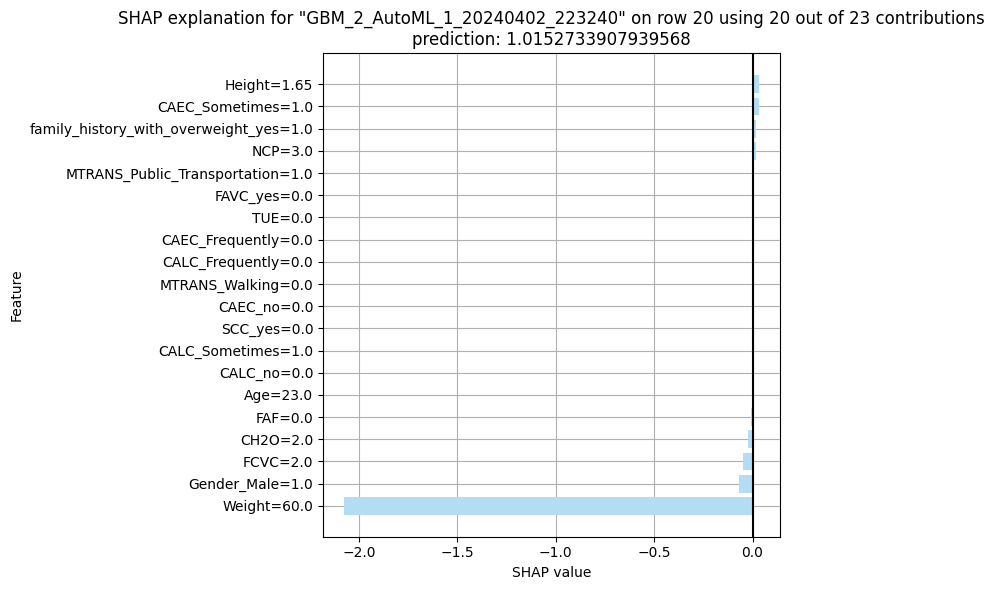

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

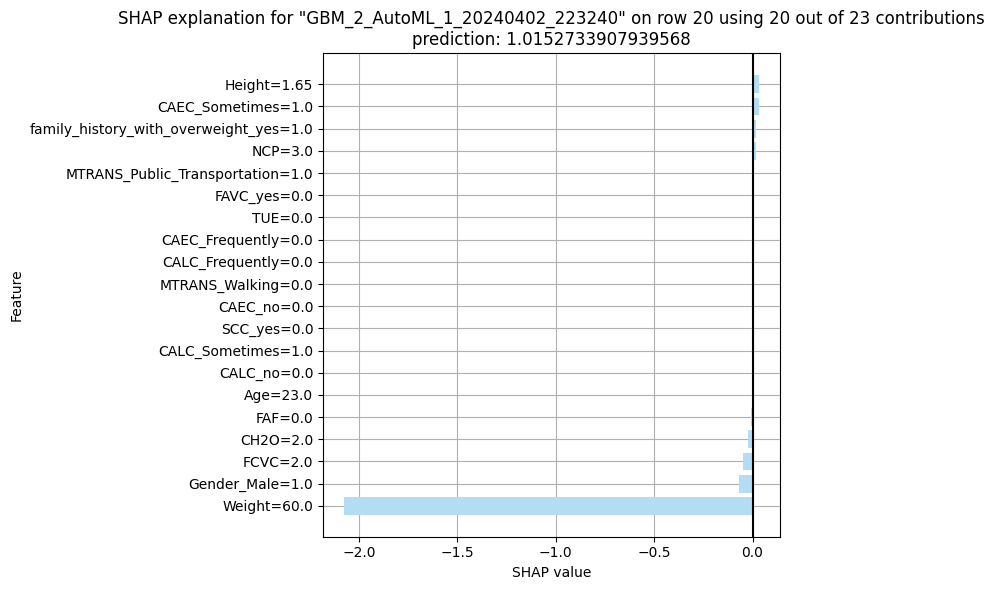

In [ ]:
aml.explain_row(frame = test, row_index = 20, figsize = (8,6), exclude_explanations = "leaderboard")


We can notice that some features have a strong interaction effect, as indicated by the spread of points along the x-axis. For instance, the interaction between Weight,Age,FCVC seems to have a wide spread of SHAP interaction values, suggesting that the combined impact of these two features on the model's output varies significantly across the dataset.

1. What is the question?

The notebook tackles several key questions across
different stages of data analysis and model building, including:

-The characteristics of the dataset, such as data types and the presence of missing values.

-The distributions of numeric variables.

-The identification of independent variables that are significant predictors for a target variable.

-To Combine Data Cleaning, Feature Selection, Modeling, and Interpretability.

-The evaluation of model performance and interpretability.

2. What did you do?

Data Types and Missing Values: The notebook examines the dataset to identify numeric and categorical variables, checks for missing values, and finds that there are no missing data points across the variables.

Distributions of Numeric Variables: It uses histograms and Q-Q plots to explore the distributions, finding, for example, that the age variable likely has a bimodal distribution.

Label Encoding: Categorical variables are converted to numerical values using LabelEncoder and ordinal mapping for machine learning readiness.

Variable Importance for Prediction: Various methods, including univariate analysis, OLS regression, correlation, and random forest classifiers, are used to identify key predictors for the target variable. The significant predictors identified include age, height, weight, and dietary habits among others.

Model Building and Evaluation: The notebook discusses using AutoML and H2O.ai for building predictive models, highlighting a stacked ensemble model as the best performer with a significant R-squared value, indicating strong predictive capability.
3. How well did it work?

The identification of data types and missing values provides a clean bill of health for the dataset, indicating readiness for further analysis.
The exploration of numeric variable distributions through visual methods offers insights into the data's underlying structure, which is critical for selecting appropriate models.

The successful encoding of categorical variables into numerical values allows for the use of various machine learning algorithms that require numerical input.

The evaluation of variable importance helps in understanding which features are most predictive of the target variable, aiding in model selection and simplification.

The AutoML and H2O.ai analysis culminates in identifying a highly effective predictive model, with the stacked ensemble model showing exemplary performance metrics. This demonstrates the power of automated machine learning in handling complex predictive tasks.

4. What did you learn?

The process highlighted the importance of thorough data preprocessing, including dealing with categorical variables and understanding data distributions.

The analysis underscored the value of exploring multiple methods to identify important predictors, reflecting the complexity of real-world data and the need for diverse analytical approaches.

The high performance of the stacked ensemble model reinforced the notion that combining the strengths of various models can lead to superior predictive performance. It also showcased the effectiveness of AutoML in simplifying the model selection and training process, making advanced data analysis more accessible.

# Licence


**MIT License**

Copyright (c) 2024 nikhilgodalla

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.